# 2. Exploring Relationships (Task 6.2)

#### In this notebook, the same process is applied to the main dataframe, 'df_matchstats' and three other subsets based on court surface. The goal was to see if the court surface had any affect on any of the variables or the correlations between them.

## 1. Importing Data and Libraries
## 2. df_matchstats
#### 2a. Cleaning
#### 2b. Correlation Heatmap
#### 2c. Scatterplot
#### 2d. Pair Plot
#### 2e. Categorical Plot
## 3. df_grass
#### 3a. Cleaning
#### 3b. Correlation Heatmap
#### 3c. Scatterplot
#### 3d. Pair Plot
#### 3e. Categorical Plot
## 4. df_clay
#### 4a. Cleaning
#### 4b. Correlation Heatmap
#### 4c. Scatterplot
#### 4d. Pair Plot
#### 4e. Categorical Plot
## 5. df_hard
#### 5a. Cleaning
#### 5b. Correlation Heatmap
#### 5c. Scatterplot
#### 5d. Pair Plot
#### 5e. Categorical Plot
## 6. Comparing Correlations Across Surfaces (including preliminary insights)
## 7. Exporting dataframes for Tableau


# 1. Importing Data and Libraries

In [1]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import matplotlib

# 2. df_matchstats

In [3]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [4]:
#Show all columns
pd.set_option('display.max_columns', None)

In [5]:
#Show all rows
pd.set_option('display.max_rows', None)

In [6]:
#check head
df_matchstats.head()

tourney_id  Year tourney_name surface tourney_level winner_id  \
119317   2000-301  2000     Auckland    Hard             A    103163   
119318   2000-301  2000     Auckland    Hard             A    102607   
119319   2000-301  2000     Auckland    Hard             A    103252   
119320   2000-301  2000     Auckland    Hard             A    103507   
119321   2000-301  2000     Auckland    Hard             A    102103   

       winner_ioc          winner_name  winner_age  winner_rank  winner_ht  \
119317        GER           Tommy Haas        21.7         11.0      188.0   
119318        ESP        Juan Balcells        24.5        211.0      190.0   
119319        ESP       Alberto Martin        21.3         48.0      175.0   
119320        ESP  Juan Carlos Ferrero        19.9         45.0      183.0   
119321        USA         Michael Sell        27.3        167.0      180.0   

       loser_id loser_ioc           loser_name  loser_rank  loser_ht  \
119317   101543       USA         Jeff Tarango        63.0     180.0   
119318   102644       ARG     Franco Squillari        49.0     183.0   
119319   102238       ESP  Alberto Berasategui        59.0     173.0   
119320   103819       SUI        Roger Federer        61.0     185.0   
119321   102765       FRA       Nicolas Escude        34.0     185.0   

        loser_age best_of round  minutes  w_#ServeGames  w_#aces  w_#dfs  \
119317       31.1       3   R32    108.0           17.0     18.0     4.0   
119318       24.3       3   R32     85.0           12.0      5.0     3.0   
119319       26.5       3   R32     56.0            8.0      0.0     0.0   
119320       18.4       3   R32     68.0           10.0      5.0     1.0   
119321       23.7       3   R32    115.0           13.0      1.0     2.0   

        w_#ServePoints  w_#1stServesIn  w_#2ndServePoints  w_%1stServesIn  \
119317            96.0            49.0               47.0              51   
119318            76.0            52.0               24.0              68   
119319            55.0            35.0               20.0              63   
119320            53.0            28.0               25.0              52   
119321            98.0            66.0               32.0              67   

        w_#1stWon  w_%1stWon  w_#2ndWon  w_%2ndWon  w_bpSaved  w_#bpFaced  \
119317       39.0         79       28.0         59        3.0         5.0   
119318       39.0         75       13.0         54        5.0         6.0   
119319       25.0         71       12.0         60        1.0         1.0   
119320       26.0         92       15.0         60        0.0         0.0   
119321       39.0         59       14.0         43        6.0        11.0   

        l_#ServeGames  l_#aces  l_#dfs  l_#ServePoints  l_#1stServesIn  \
119317           17.0      7.0     8.0           106.0            55.0   
119318           12.0      5.0    10.0            74.0            32.0   
119319            8.0      0.0     6.0            56.0            33.0   
119320           10.0     11.0     2.0            70.0            43.0   
119321           12.0      8.0     8.0            92.0            46.0   

        l_#2ndServePoints  l_%1stServesIn  l_#1stWon  l_%1stWon  l_#2ndWon  \
119317               51.0              51       39.0         70       29.0   
119318               42.0              43       25.0         78       18.0   
119319               23.0              58       20.0         60        7.0   
119320               27.0              61       29.0         67       14.0   
119321               46.0              50       34.0         73       18.0   

        l_%2ndWon  l_bpSaved  l_#bpFaced  
119317         56        4.0         7.0  
119318         42        3.0         6.0  
119319         30        7.0        11.0  
119320         51        6.0         8.0  
119321         39        5.0         9.0

### 2A. Cleaning

In [7]:
df_matchstats.shape

(62530, 46)

In [8]:
df_matchstats.columns

Index(['tourney_id', 'Year', 'tourney_name', 'surface', 'tourney_level',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_age', 'winner_rank',
       'winner_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_#ServeGames',
       'w_#aces', 'w_#dfs', 'w_#ServePoints', 'w_#1stServesIn',
       'w_#2ndServePoints', 'w_%1stServesIn', 'w_#1stWon', 'w_%1stWon',
       'w_#2ndWon', 'w_%2ndWon', 'w_bpSaved', 'w_#bpFaced', 'l_#ServeGames',
       'l_#aces', 'l_#dfs', 'l_#ServePoints', 'l_#1stServesIn',
       'l_#2ndServePoints', 'l_%1stServesIn', 'l_#1stWon', 'l_%1stWon',
       'l_#2ndWon', 'l_%2ndWon', 'l_bpSaved', 'l_#bpFaced'],
      dtype='object')

In [9]:
df_matchstats.dtypes

tourney_id            object
Year                  object
tourney_name          object
surface               object
tourney_level         object
winner_id             object
winner_ioc            object
winner_name           object
winner_age           float64
winner_rank          float64
winner_ht            float64
loser_id              object
loser_ioc             object
loser_name            object
loser_rank           float64
loser_ht             float64
loser_age            float64
best_of               object
round                 object
minutes              float64
w_#ServeGames        float64
w_#aces              float64
w_#dfs               float64
w_#ServePoints       float64
w_#1stServesIn       float64
w_#2ndServePoints    float64
w_%1stServesIn         int64
w_#1stWon            float64
w_%1stWon              int64
w_#2ndWon            float64
w_%2ndWon              int64
w_bpSaved            float64
w_#bpFaced           float64
l_#ServeGames        float64
l_#aces       

In [10]:
# Check for missing values

df_matchstats.isnull().sum() #will disregard data pertaining to 'winner_rank', 'loser_rank' and 'minutes'

tourney_id              0
Year                    0
tourney_name            0
surface                 0
tourney_level           0
winner_id               0
winner_ioc              0
winner_name             0
winner_age              0
winner_rank            89
winner_ht             198
loser_id                0
loser_ioc               0
loser_name              0
loser_rank            296
loser_ht              729
loser_age               2
best_of                 0
round                   0
minutes              1456
w_#ServeGames           0
w_#aces                 0
w_#dfs                  0
w_#ServePoints          0
w_#1stServesIn          0
w_#2ndServePoints       0
w_%1stServesIn          0
w_#1stWon               0
w_%1stWon               0
w_#2ndWon               0
w_%2ndWon               0
w_bpSaved               0
w_#bpFaced              0
l_#ServeGames           0
l_#aces                 0
l_#dfs                  0
l_#ServePoints          0
l_#1stServesIn          0
l_#2ndServeP

In [11]:
# Find duplicates

df_matchstats_dups = df_matchstats[df_matchstats.duplicated()]

In [12]:
df_matchstats_dups.shape #no duplicates

(0, 46)

In [13]:
for col in df_matchstats.columns.tolist():
      weird = (df_matchstats[[col]].applymap(type) != df_matchstats[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_matchstats[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

## 2B. Correlation Heatmap

In [14]:
#create subset: drop irrelevant variables

df_matchstats1 = df_matchstats.drop(columns = ['tourney_id',
                                               'Year',
                                              'tourney_name',
                                              'surface',
                                               'tourney_level',
                                              'winner_id',
                                               'winner_name',
                                               'winner_ioc',
                                               'winner_age',
                                               'winner_rank',
                                               'loser_id', 
                                               'loser_name',
                                               'loser_ioc',
                                               'loser_rank',
                                               'loser_age',
                                               'best_of',
                                               'round',
                                               'minutes'])

In [15]:
df_matchstats1.corr()
# There are way too many variables to cleanly present on a heatmap; divide into following - 
# keep mostly "percentage" variables to reduce dataset size

winner_ht  loser_ht  w_#ServeGames   w_#aces    w_#dfs  \
winner_ht           1.000000  0.037679       0.051947  0.420029  0.058137   
loser_ht            0.037679  1.000000       0.069174  0.005038 -0.003332   
w_#ServeGames       0.051947  0.069174       1.000000  0.432556  0.440899   
w_#aces             0.420029  0.005038       0.432556  1.000000  0.249549   
w_#dfs              0.058137 -0.003332       0.440899  0.249549  1.000000   
w_#ServePoints      0.017224  0.048769       0.945040  0.374667  0.489420   
w_#1stServesIn      0.034454  0.070491       0.900223  0.349382  0.366299   
w_#2ndServePoints  -0.011411  0.006944       0.810369  0.332184  0.564657   
w_%1stServesIn      0.052805  0.069664       0.002433 -0.013817 -0.269606   
w_#1stWon           0.112507  0.101707       0.907166  0.483387  0.377499   
w_%1stWon           0.243258  0.079533      -0.176501  0.327681 -0.053372   
w_#2ndWon          -0.010631  0.056318       0.762694  0.320631  0.419074   
w_%2ndWon           0.002183  0.100311      -0.183870 -0.058780 -0.363380   
w_bpSaved          -0.079254 -0.036835       0.437938  0.060144  0.341562   
w_#bpFaced         -0.114588 -0.064639       0.549463  0.030578  0.402761   
l_#ServeGames       0.042469  0.070364       0.986407  0.419392  0.438920   
l_#aces             0.030080  0.381812       0.513611  0.313587  0.196208   
l_#dfs             -0.023990  0.078753       0.346249  0.127065  0.247601   
l_#ServePoints      0.020137  0.052015       0.930784  0.381513  0.421229   
l_#1stServesIn      0.048482  0.061262       0.881948  0.382386  0.370756   
l_#2ndServePoints  -0.026541  0.026288       0.788193  0.292100  0.398755   
l_%1stServesIn      0.081136  0.037671       0.093195  0.084620 -0.031204   
l_#1stWon           0.088953  0.137127       0.899378  0.451454  0.371374   
l_%1stWon           0.136850  0.243651       0.354109  0.313537  0.135234   
l_#2ndWon           0.047574  0.026368       0.786220  0.370171  0.382356   
l_%2ndWon           0.155991  0.019303       0.303449  0.271823  0.119483   
l_bpSaved          -0.065360 -0.038917       0.366125  0.060618  0.178456   
l_#bpFaced         -0.132425 -0.104471       0.379789 -0.025388  0.204312   

                   w_#ServePoints  w_#1stServesIn  w_#2ndServePoints  \
winner_ht                0.017224        0.034454          -0.011411   
loser_ht                 0.048769        0.070491           0.006944   
w_#ServeGames            0.945040        0.900223           0.810369   
w_#aces                  0.374667        0.349382           0.332184   
w_#dfs                   0.489420        0.366299           0.564657   
w_#ServePoints           1.000000        0.941851           0.873060   
w_#1stServesIn           0.941851        1.000000           0.658440   
w_#2ndServePoints        0.873060        0.658440           1.000000   
w_%1stServesIn          -0.027921        0.286364          -0.478079   
w_#1stWon                0.910283        0.961886           0.643042   
w_%1stWon               -0.309007       -0.333465          -0.208216   
w_#2ndWon                0.777838        0.568020           0.917931   
w_%2ndWon               -0.295374       -0.272249          -0.266512   
w_bpSaved                0.614363        0.561081           0.561854   
w_#bpFaced               0.695912        0.630283           0.644086   
l_#ServeGames            0.936498        0.891212           0.804312   
l_#aces                  0.474609        0.467846           0.384129   
l_#dfs                   0.332413        0.288570           0.325788   
l_#ServePoints           0.895547        0.850717           0.771353   
l_#1stServesIn           0.845353        0.820795           0.702350   
l_#2ndServePoints        0.763108        0.698583           0.695481   
l_%1stServesIn           0.082115        0.123103           0.005285   
l_#1stWon                0.860350        0.836837           0.712660   
l_%1stWon                0.338109        0.327799        

In [16]:
# keeping mostly "percentage" variables to reduce dataset size
df_matchstats2 = df_matchstats1.drop(columns = ['w_#ServeGames', 
                                                        'w_#aces',
                                                        'w_#dfs',
                                                        'w_#1stServesIn',
                                                        'w_#2ndServePoints',
                                                        'w_#1stWon',
                                                        'w_#2ndWon',
                                                        'w_bpSaved',
                                                        'l_#ServeGames',
                                                        'l_#aces',
                                                        'l_#dfs',
                                                        'l_#1stServesIn', 
                                                        'l_#2ndServePoints', 
                                                        'l_#1stWon',
                                                        'l_#2ndWon',
                                                        'l_bpSaved'])

In [17]:
df_matchstats2.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  62332.000000  61801.000000    62530.000000    62530.000000   
mean     186.182603    185.611317       77.922469       61.061427   
std        6.826430      6.776734       29.176144        8.180105   
min      163.000000    163.000000        3.000000       12.000000   
25%      183.000000    181.000000       56.000000       56.000000   
50%      185.000000    185.000000       73.000000       61.000000   
75%      190.000000    190.000000       94.000000       67.000000   
max      211.000000    211.000000      491.000000       98.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  62530.000000  62530.000000  62530.000000    62530.000000   
mean      76.289637     56.223413      5.038893       80.973885   
std        8.141773     10.496364      4.034177       29.154055   
min        0.000000      0.000000      0.000000        3.000000   
25%       71.000000     50.000000      2.000000       60.000000   
50%       76.000000     56.000000      4.000000       76.000000   
75%       82.000000     63.000000      7.000000       97.000000   
max      100.000000    129.000000     30.000000      489.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon    l_#bpFaced  
count    62530.000000  62530.000000  62530.000000  62530.000000  
mean        59.158452     65.442875     44.859332      8.630977  
std          8.272118      9.668002     10.276116      4.142344  
min         12.000000      0.000000      0.000000      0.000000  
25%         54.000000     60.000000     38.000000      6.000000  
50%         59.000000     66.000000     45.000000      8.000000  
75%         65.000000     72.000000     52.000000     11.000000  
max         97.000000    100.000000    100.000000     38.000000

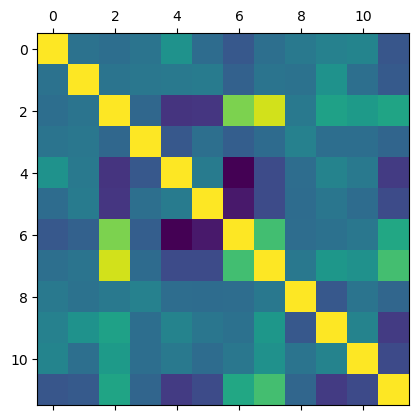

In [18]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_matchstats2.corr())
plt.show()

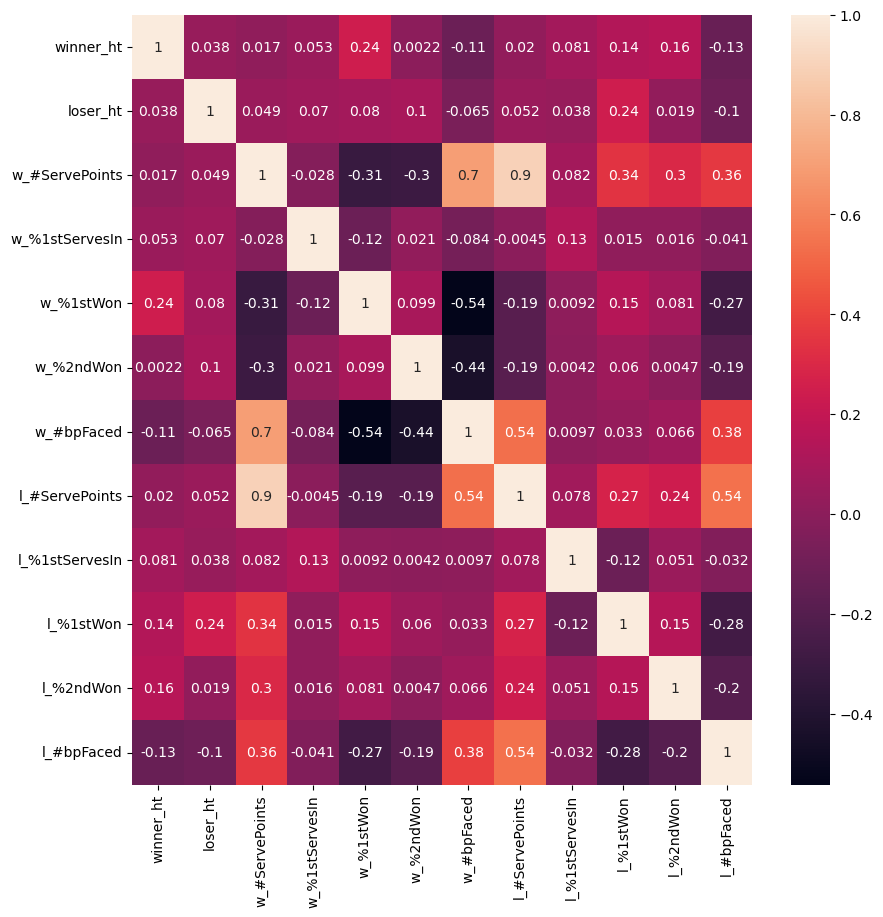

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_matchstats2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Text(0.5, 1.0, 'Serve Stats')

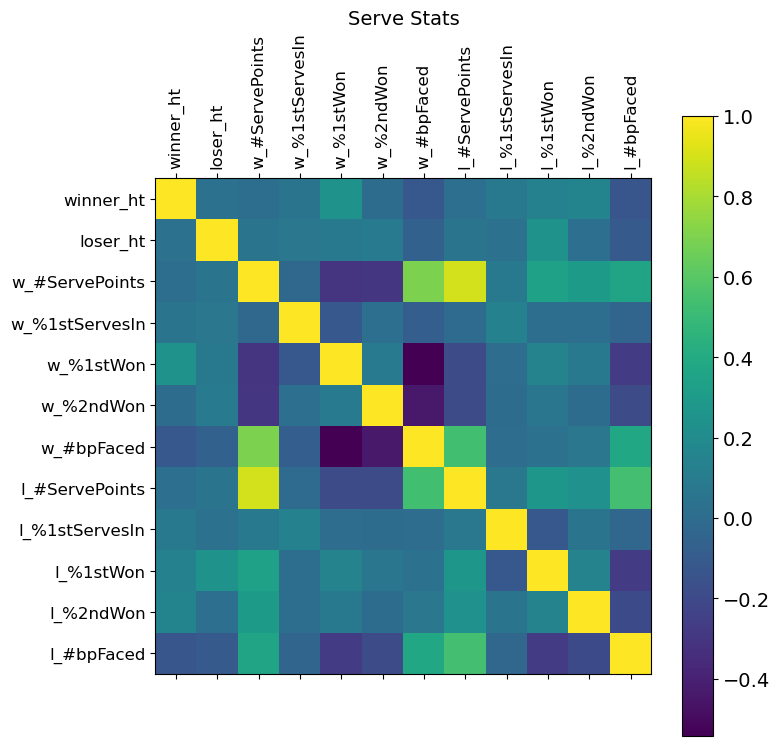

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_matchstats2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_matchstats2.shape[1]), df_matchstats2, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_matchstats2.shape[1]), df_matchstats2.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Serve Stats', fontsize=14) # add title

### 2C. Scatterplots

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


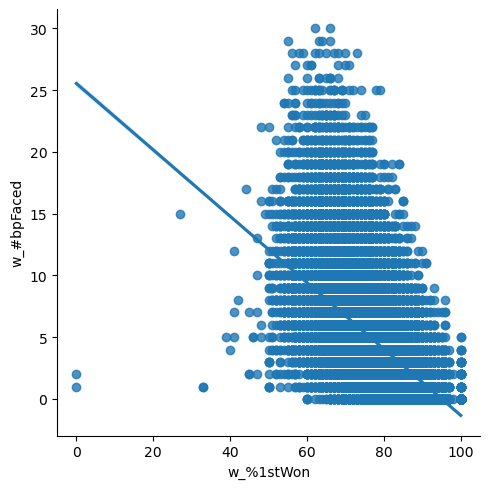

In [21]:
# Create a scatterplot for the "w_%1stWon" and "w_#bpFaced" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'w_#bpFaced', data = df_matchstats2)

### 2D. Pairplot

In [22]:
# Keep only the variables you want to use in the pair plot

df_matchstats2_pairplot = df_matchstats2[['w_%1stWon', 'w_%1stServesIn', 'w_%2ndWon','winner_ht','w_#bpFaced']]

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


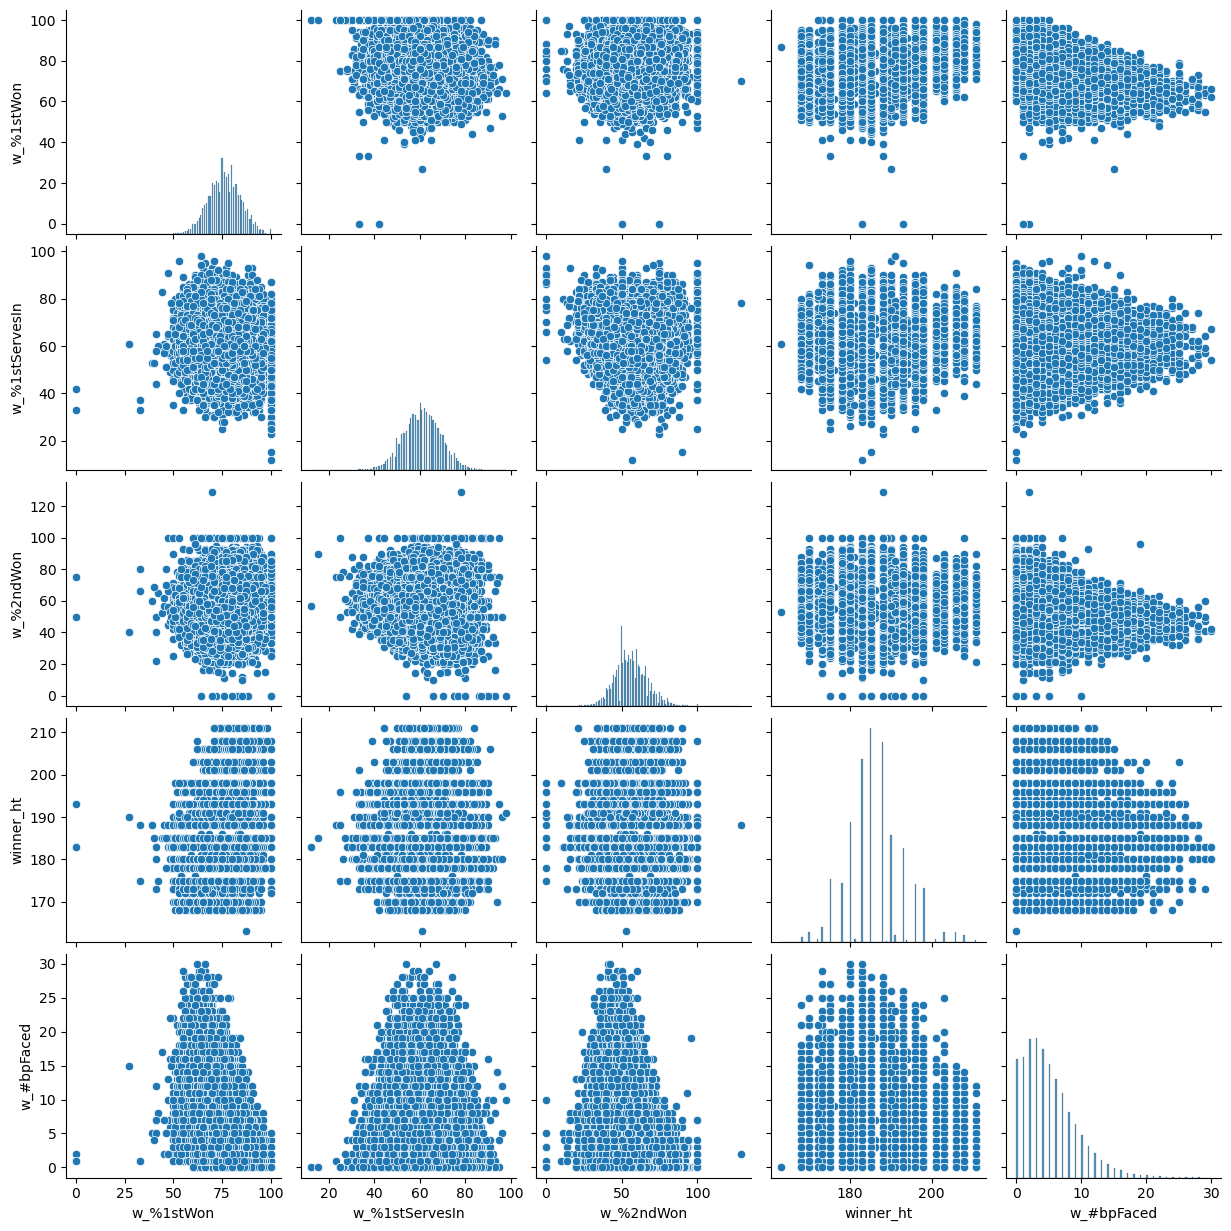

In [23]:
# Create a pair plot 

g = sns.pairplot(df_matchstats2_pairplot)

### 2E. Categorical Plot

#### Using a categorical plot to compare winner and loser's stats on three variables each:
- points won on first serve
- points won on second serve
- percentage of first serves in play
- height

In [24]:
df_matchstats2.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  62332.000000  61801.000000    62530.000000    62530.000000   
mean     186.182603    185.611317       77.922469       61.061427   
std        6.826430      6.776734       29.176144        8.180105   
min      163.000000    163.000000        3.000000       12.000000   
25%      183.000000    181.000000       56.000000       56.000000   
50%      185.000000    185.000000       73.000000       61.000000   
75%      190.000000    190.000000       94.000000       67.000000   
max      211.000000    211.000000      491.000000       98.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  62530.000000  62530.000000  62530.000000    62530.000000   
mean      76.289637     56.223413      5.038893       80.973885   
std        8.141773     10.496364      4.034177       29.154055   
min        0.000000      0.000000      0.000000        3.000000   
25%       71.000000     50.000000      2.000000       60.000000   
50%       76.000000     56.000000      4.000000       76.000000   
75%       82.000000     63.000000      7.000000       97.000000   
max      100.000000    129.000000     30.000000      489.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon    l_#bpFaced  
count    62530.000000  62530.000000  62530.000000  62530.000000  
mean        59.158452     65.442875     44.859332      8.630977  
std          8.272118      9.668002     10.276116      4.142344  
min         12.000000      0.000000      0.000000      0.000000  
25%         54.000000     60.000000     38.000000      6.000000  
50%         59.000000     66.000000     45.000000      8.000000  
75%         65.000000     72.000000     52.000000     11.000000  
max         97.000000    100.000000    100.000000     38.000000

### Percentage of first serve points won

##### The winner mean for first serve points won is about 10% more than the loser (76.2% to 65.4%)

<Axes: xlabel='w_%1stWon', ylabel='Count'>

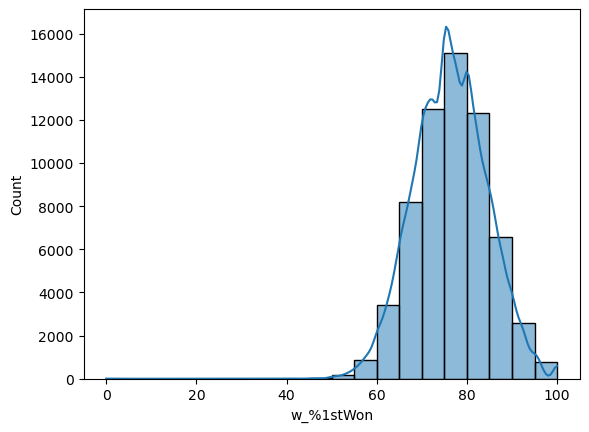

In [25]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_matchstats2['w_%1stWon'], bins = 20, kde = True)

<Axes: xlabel='l_%1stWon', ylabel='Count'>

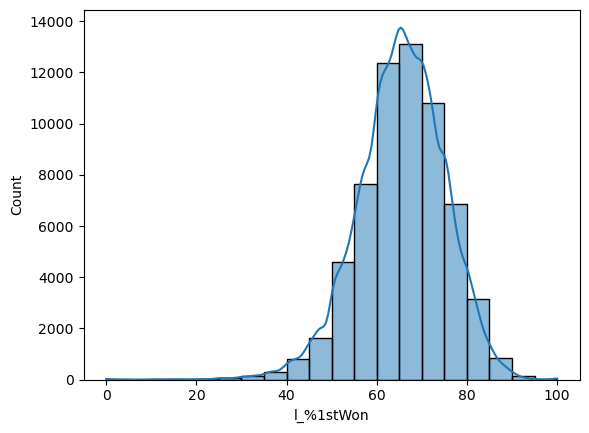

In [26]:
sns.histplot(df_matchstats2['l_%1stWon'], bins = 20, kde = True)

### Percentage of second serve points won

##### The winner mean for second serve points won is about 10% more than the loser (56.2% to 44.85%)

<Axes: xlabel='w_%2ndWon', ylabel='Count'>

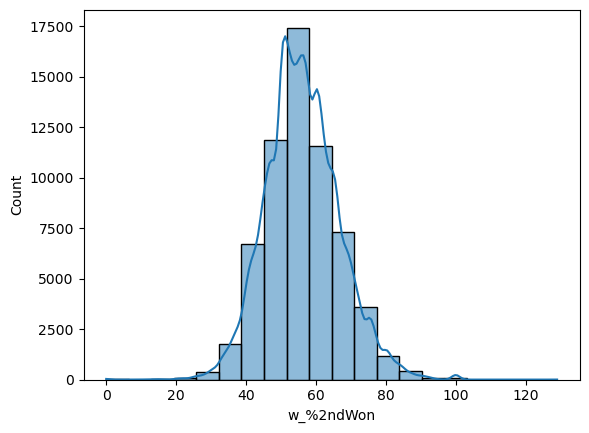

In [27]:
sns.histplot(df_matchstats2['w_%2ndWon'], bins = 20, kde = True)

<Axes: xlabel='l_%2ndWon', ylabel='Count'>

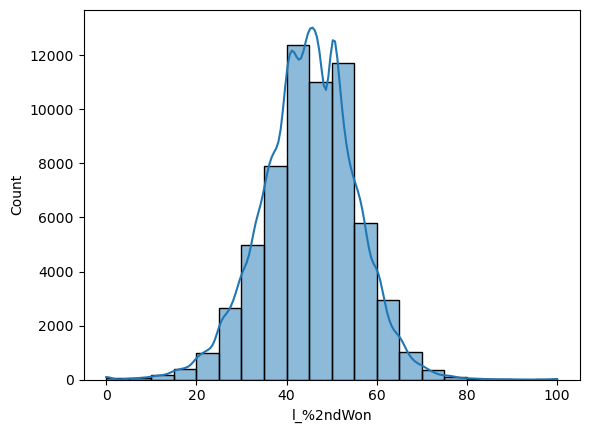

In [28]:
sns.histplot(df_matchstats2['l_%2ndWon'], bins = 20, kde = True)

### Percentage of First Serves in Play

##### No clear visible difference between first serve percentage between winner and loser

<Axes: xlabel='w_%1stServesIn', ylabel='Count'>

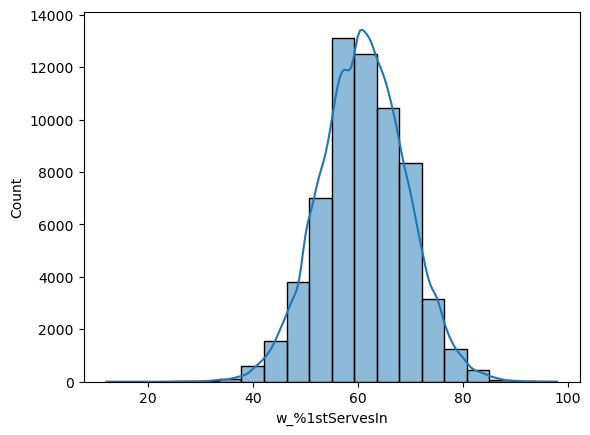

In [29]:
sns.histplot(df_matchstats2['w_%1stServesIn'], bins = 20, kde = True)

<Axes: xlabel='l_%1stServesIn', ylabel='Count'>

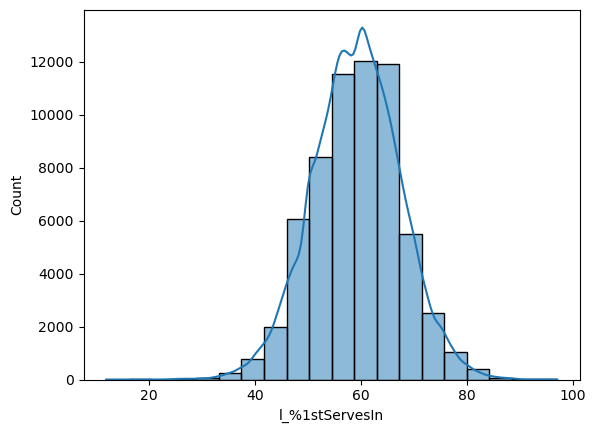

In [30]:
sns.histplot(df_matchstats2['l_%1stServesIn'], bins = 20, kde = True)

### Height

##### No clear visible difference between winner and loser's heights on these graphs

<Axes: xlabel='winner_ht', ylabel='Count'>

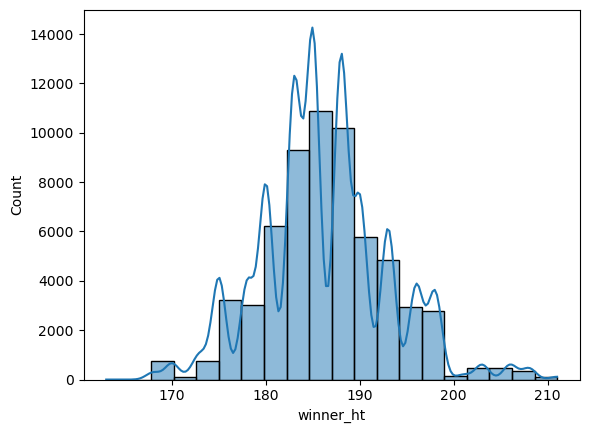

In [31]:
sns.histplot(df_matchstats2['winner_ht'], bins = 20, kde = True)

<Axes: xlabel='loser_ht', ylabel='Count'>

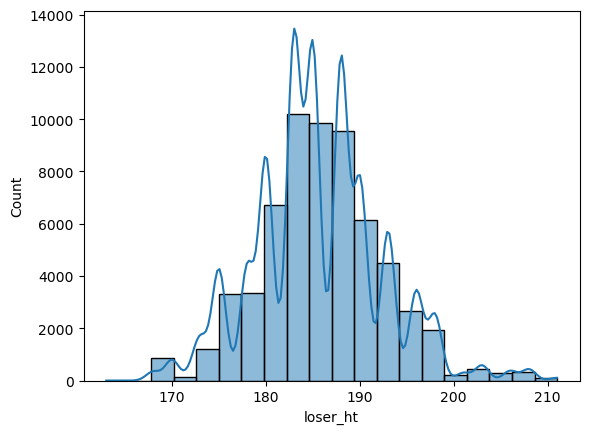

In [32]:
sns.histplot(df_matchstats2['loser_ht'], bins = 20, kde = True)

## 3. df_grass
#### 3a. Cleaning
#### 3b. Correlation Heatmap
#### 3c. Scatterplot
#### 3d. Pair Plot
#### 3e. Categorical Plot

### 3A. Cleaning

In [33]:
#Import df_grass
df_grass = pd.read_pickle(os.path.join(path, 'Prepared Data','Subsets','df_grass.pkl'))

In [34]:
df_grass.head()

tourney_id  Year  tourney_name surface tourney_level winner_id  \
119410   2000-311  2000  Queen's Club   Grass             A    102179   
119411   2000-311  2000  Queen's Club   Grass             A    101150   
119412   2000-311  2000  Queen's Club   Grass             A    101086   
119413   2000-311  2000  Queen's Club   Grass             A    102257   
119414   2000-311  2000  Queen's Club   Grass             A    102533   

       winner_ioc       winner_name  winner_age  winner_rank  winner_ht  \
119410        FRA     Antony Dupuis        27.2        105.0      185.0   
119411        ITA    Gianluca Pozzi        34.9         76.0      180.0   
119412        USA     Ronald Agenor        35.5         97.0      180.0   
119413        GBR     Greg Rusedski        26.7         20.0      193.0   
119414        GER  Jens Knippschild        25.3        114.0      190.0   

       loser_id loser_ioc         loser_name  loser_rank  loser_ht  loser_age  \
119410   101320       SWE  Magnus Gustafsson        77.0     185.0       33.4   
119411   101733       NED      Jan Siemerink       125.0     183.0       30.1   
119412   101820       SUI        Marc Rosset        34.0     201.0       29.5   
119413   101965       RSA     Wayne Ferreira        42.0     185.0       28.7   
119414   102755       USA          Alex Witt       498.0       NaN       24.2   

       best_of round  minutes  w_#ServeGames  w_#aces  w_#dfs  w_#ServePoints  \
119410       3   R64    113.0           15.0      5.0     0.0           102.0   
119411       3   R64    112.0           13.0      4.0     5.0            92.0   
119412       3   R64     42.0            6.0      2.0     0.0            31.0   
119413       3   R64     67.0           11.0     14.0     5.0            61.0   
119414       3   R64     96.0           14.0      7.0     3.0            70.0   

        w_#1stServesIn  w_#2ndServePoints  w_%1stServesIn  w_#1stWon  \
119410            63.0               39.0              61       45.0   
119411            47.0               45.0              51       35.0   
119412            22.0                9.0              70       20.0   
119413            34.0               27.0              55       28.0   
119414            34.0               36.0              48       29.0   

        w_%1stWon  w_#2ndWon  w_%2ndWon  w_bpSaved  w_#bpFaced  l_#ServeGames  \
119410         71       22.0         56       10.0        12.0           14.0   
119411         74       25.0         55        9.0        11.0           13.0   
119412         90        4.0         44        0.0         0.0            5.0   
119413         82       15.0         55        3.0         4.0           11.0   
119414         85       22.0         61        2.0         4.0           14.0   

        l_#aces  l_#dfs  l_#ServePoints  l_#1stServesIn  l_#2ndServePoints  \
119410      6.0     7.0            78.0            44.0               34.0   
119411      6.0     7.0            97.0            54.0               43.0   
119412      3.0     5.0            36.0            16.0               20.0   
119413      7.0     7.0            68.0            33.0               35.0   
119414      8.0     4.0            97.0            50.0               47.0   

        l_%1stServesIn  l_#1stWon  l_%1stWon  l_#2ndWon  l_%2ndWon  l_bpSaved  \
119410              56       34.0         77       17.0         50        4.0   
119411              55       33.0         61       20.0         46       11.0   
119412              44       12.0         75        7.0         35        2.0   
119413              48       22.0         66       19.0         54        5.0   
119414              51       32.0         64       26.0         55        5.0   

        l_#bpFaced  
119410         7.0  
119411        16.0  
119412         4.0  
119413         8.0  
119414         8.0

In [35]:
df_grass.shape

(6836, 46)

In [36]:
df_grass.columns

Index(['tourney_id', 'Year', 'tourney_name', 'surface', 'tourney_level',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_age', 'winner_rank',
       'winner_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_#ServeGames',
       'w_#aces', 'w_#dfs', 'w_#ServePoints', 'w_#1stServesIn',
       'w_#2ndServePoints', 'w_%1stServesIn', 'w_#1stWon', 'w_%1stWon',
       'w_#2ndWon', 'w_%2ndWon', 'w_bpSaved', 'w_#bpFaced', 'l_#ServeGames',
       'l_#aces', 'l_#dfs', 'l_#ServePoints', 'l_#1stServesIn',
       'l_#2ndServePoints', 'l_%1stServesIn', 'l_#1stWon', 'l_%1stWon',
       'l_#2ndWon', 'l_%2ndWon', 'l_bpSaved', 'l_#bpFaced'],
      dtype='object')

In [37]:
df_grass.dtypes

tourney_id            object
Year                  object
tourney_name          object
surface               object
tourney_level         object
winner_id             object
winner_ioc            object
winner_name           object
winner_age           float64
winner_rank          float64
winner_ht            float64
loser_id              object
loser_ioc             object
loser_name            object
loser_rank           float64
loser_ht             float64
loser_age            float64
best_of               object
round                 object
minutes              float64
w_#ServeGames        float64
w_#aces              float64
w_#dfs               float64
w_#ServePoints       float64
w_#1stServesIn       float64
w_#2ndServePoints    float64
w_%1stServesIn         int64
w_#1stWon            float64
w_%1stWon              int64
w_#2ndWon            float64
w_%2ndWon              int64
w_bpSaved            float64
w_#bpFaced           float64
l_#ServeGames        float64
l_#aces       

In [38]:
# Check for missing values

df_grass.isnull().sum() #will disregard data pertaining to 'winner_rank', 'loser_rank' and 'minutes'

tourney_id             0
Year                   0
tourney_name           0
surface                0
tourney_level          0
winner_id              0
winner_ioc             0
winner_name            0
winner_age             0
winner_rank           19
winner_ht             19
loser_id               0
loser_ioc              0
loser_name             0
loser_rank            29
loser_ht              54
loser_age              0
best_of                0
round                  0
minutes              318
w_#ServeGames          0
w_#aces                0
w_#dfs                 0
w_#ServePoints         0
w_#1stServesIn         0
w_#2ndServePoints      0
w_%1stServesIn         0
w_#1stWon              0
w_%1stWon              0
w_#2ndWon              0
w_%2ndWon              0
w_bpSaved              0
w_#bpFaced             0
l_#ServeGames          0
l_#aces                0
l_#dfs                 0
l_#ServePoints         0
l_#1stServesIn         0
l_#2ndServePoints      0
l_%1stServesIn         0


In [39]:
# Find duplicates

df_dups_grass = df_grass[df_grass.duplicated()]

In [40]:
df_dups_grass.shape #no duplicates

(0, 46)

In [41]:
for col in df_grass.columns.tolist():
      weird = (df_grass[[col]].applymap(type) != df_grass[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_grass[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

### 3B. Correlation Heatmap

In [42]:
#create subset: drop irrelevant variables (same as in Section 2B for df_matchstats)

df_grass_1 = df_grass.drop(columns = ['tourney_id',
                                  'Year',
                                  'tourney_name',
                                  'surface',
                                  'tourney_level',
                                  'winner_id',
                                  'winner_name',
                                  'winner_ioc',
                                  'winner_age',
                                  'winner_rank',
                                  'loser_id', 
                                  'loser_name',
                                  'loser_ioc',
                                  'loser_rank',
                                  'loser_age',
                                  'best_of',
                                  'round',
                                  'minutes',
                                  'w_#ServeGames', 
                                  'w_#aces',
                                  'w_#dfs',
                                  'w_#1stServesIn',
                                  'w_#2ndServePoints',
                                  'w_#1stWon',
                                  'w_#2ndWon',
                                  'w_bpSaved',
                                  'l_#ServeGames',
                                  'l_#aces',
                                  'l_#dfs',
                                  'l_#1stServesIn', 
                                  'l_#2ndServePoints', 
                                  'l_#1stWon',
                                  'l_#2ndWon',
                                  'l_bpSaved'])

In [43]:
df_grass_1.describe()

winner_ht     loser_ht  w_#ServePoints  w_%1stServesIn    w_%1stWon  \
count  6817.000000  6782.000000     6836.000000     6836.000000  6836.000000   
mean    187.079067   185.984223       87.406671       62.330018    78.741223   
std       7.081148     6.869561       34.325511        7.343525     7.403465   
min     163.000000   168.000000        5.000000       35.000000    41.000000   
25%     183.000000   183.000000       62.000000       57.000000    74.000000   
50%     188.000000   185.000000       81.000000       62.000000    79.000000   
75%     190.000000   190.000000      106.000000       67.000000    84.000000   
max     211.000000   211.000000      491.000000       88.000000   100.000000   

         w_%2ndWon   w_#bpFaced  l_#ServePoints  l_%1stServesIn    l_%1stWon  \
count  6836.000000  6836.000000     6836.000000     6836.000000  6836.000000   
mean     56.862200     4.819046       91.438853       60.568607    68.546518   
std      10.101694     3.984152       34.469955        7.565745     8.900870   
min       0.000000     0.000000        5.000000       25.000000     0.000000   
25%      50.000000     2.000000       66.000000       56.000000    63.000000   
50%      56.000000     4.000000       86.000000       61.000000    69.000000   
75%      63.000000     7.000000      110.000000       66.000000    75.000000   
max     100.000000    28.000000      489.000000       90.000000   100.000000   

         l_%2ndWon   l_#bpFaced  
count  6836.000000  6836.000000  
mean     46.267554     8.536425  
std       9.845906     4.295486  
min       0.000000     0.000000  
25%      40.000000     5.000000  
50%      46.000000     8.000000  
75%      53.000000    11.000000  
max     100.000000    29.000000

In [44]:
df_grass_1.corr()

winner_ht  loser_ht  w_#ServePoints  w_%1stServesIn  \
winner_ht        1.000000  0.006244       -0.005662        0.124376   
loser_ht         0.006244  1.000000        0.056460        0.084245   
w_#ServePoints  -0.005662  0.056460        1.000000        0.019616   
w_%1stServesIn   0.124376  0.084245        0.019616        1.000000   
w_%1stWon        0.261248  0.064042       -0.300581       -0.068453   
w_%2ndWon        0.004202  0.101708       -0.253112        0.010541   
w_#bpFaced      -0.138828 -0.066685        0.670997       -0.098495   
l_#ServePoints   0.007048  0.043670        0.915918        0.039883   
l_%1stServesIn   0.076158  0.081436        0.114744        0.164428   
l_%1stWon        0.115535  0.256706        0.328051        0.050197   
l_%2ndWon        0.170046  0.031538        0.279062        0.065623   
l_#bpFaced      -0.145229 -0.128447        0.354973       -0.047931   

                w_%1stWon  w_%2ndWon  w_#bpFaced  l_#ServePoints  \
winner_ht        0.261248   0.004202   -0.138828        0.007048   
loser_ht         0.064042   0.101708   -0.066685        0.043670   
w_#ServePoints  -0.300581  -0.253112    0.670997        0.915918   
w_%1stServesIn  -0.068453   0.010541   -0.098495        0.039883   
w_%1stWon        1.000000   0.088274   -0.542164       -0.181710   
w_%2ndWon        0.088274   1.000000   -0.412640       -0.147324   
w_#bpFaced      -0.542164  -0.412640    1.000000        0.527910   
l_#ServePoints  -0.181710  -0.147324    0.527910        1.000000   
l_%1stServesIn   0.037119   0.029679    0.000065        0.110758   
l_%1stWon        0.090322   0.042829    0.061584        0.242047   
l_%2ndWon        0.093341  -0.003729    0.053923        0.210288   
l_#bpFaced      -0.224454  -0.152651    0.354590        0.530034   

                l_%1stServesIn  l_%1stWon  l_%2ndWon  l_#bpFaced  
winner_ht             0.076158   0.115535   0.170046   -0.145229  
loser_ht              0.081436   0.256706   0.031538   -0.128447  
w_#ServePoints        0.114744   0.328051   0.279062    0.354973  
w_%1stServesIn        0.164428   0.050197   0.065623   -0.047931  
w_%1stWon             0.037119   0.090322   0.093341   -0.224454  
w_%2ndWon             0.029679   0.042829  -0.003729   -0.152651  
w_#bpFaced            0.000065   0.061584   0.053923    0.354590  
l_#ServePoints        0.110758   0.242047   0.210288    0.530034  
l_%1stServesIn        1.000000  -0.093754   0.056072   -0.042386  
l_%1stWon            -0.093754   1.000000   0.146278   -0.299140  
l_%2ndWon             0.056072   0.146278   1.000000   -0.222104  
l_#bpFaced           -0.042386  -0.299140  -0.222104    1.000000

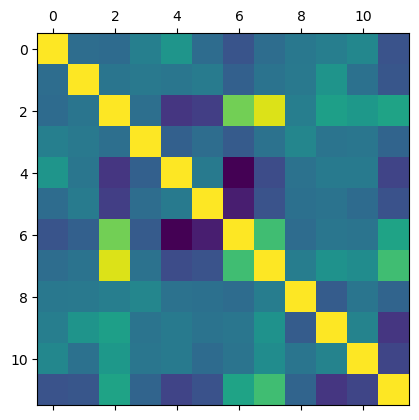

In [45]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_grass_1.corr())
plt.show()

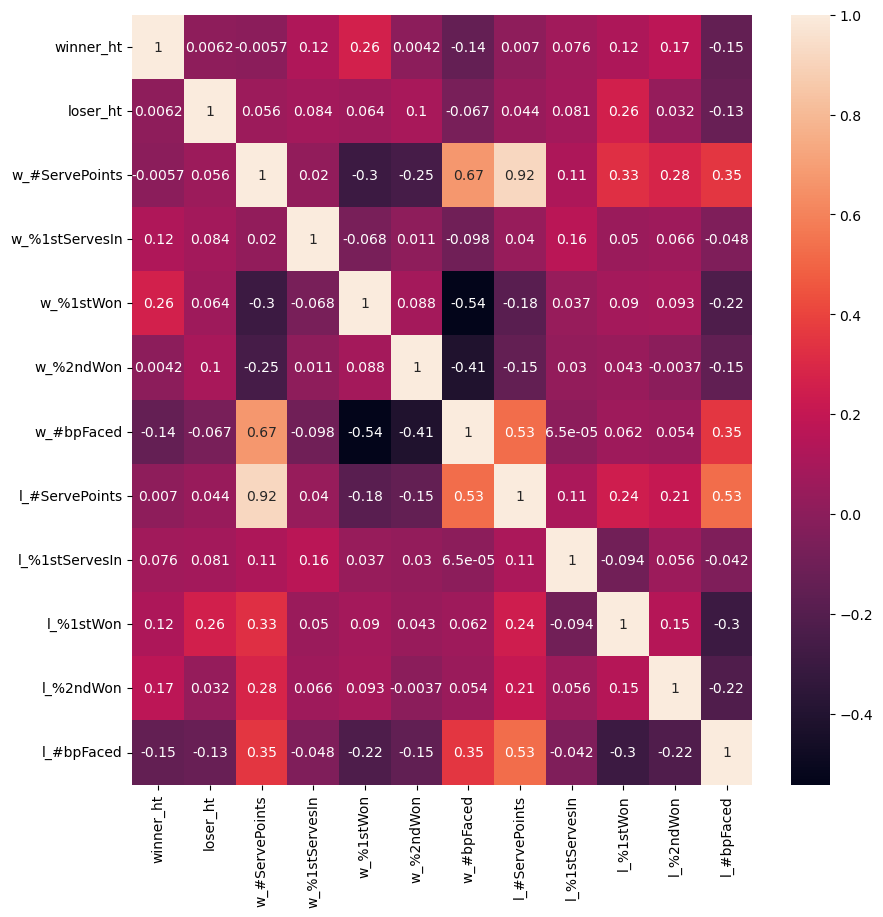

In [46]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_grass_1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Text(0.5, 1.0, 'Serve Stats in Tennis Matches on Grass Courts')

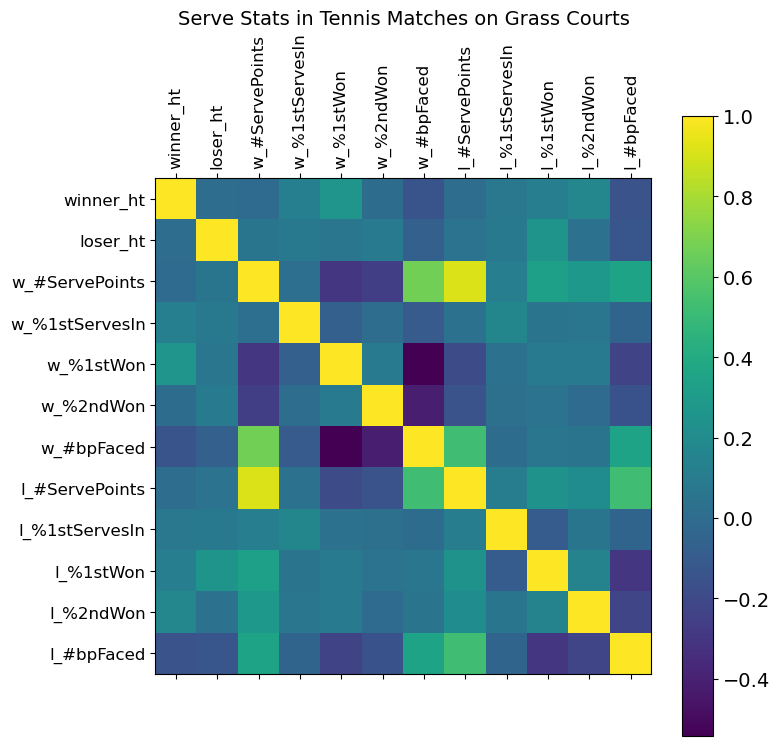

In [47]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_grass_1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_grass_1.shape[1]), df_grass_1, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_grass_1.shape[1]), df_grass_1.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Serve Stats in Tennis Matches on Grass Courts', fontsize=14) # add title

### 3C. Scatterplots

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


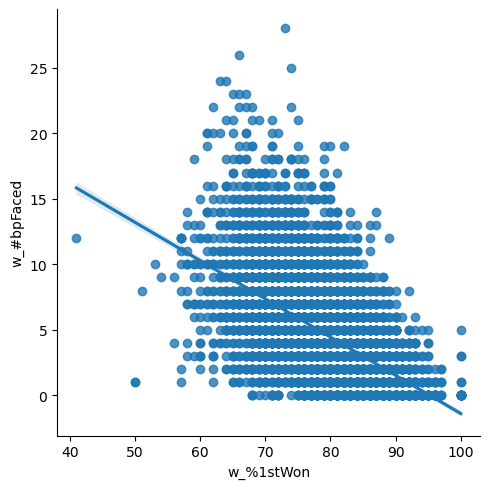

In [48]:
# Create a scatterplot for the "w_%1stWon" and "w_#bpFaced" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'w_#bpFaced', data = df_grass_1)

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


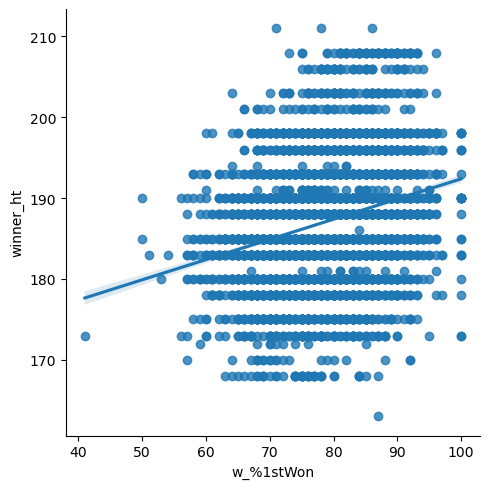

In [49]:
# Create a scatterplot for the "w_%1stWon" and "winner_ht" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'winner_ht', data = df_grass_1)

### 3D. Pairplots

In [50]:
# Keep only the variables you want to use in the pair plot

df_grass_pairplot = df_grass_1[['w_%1stWon', 'w_%1stServesIn', 'w_%2ndWon','winner_ht','w_#bpFaced']]

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


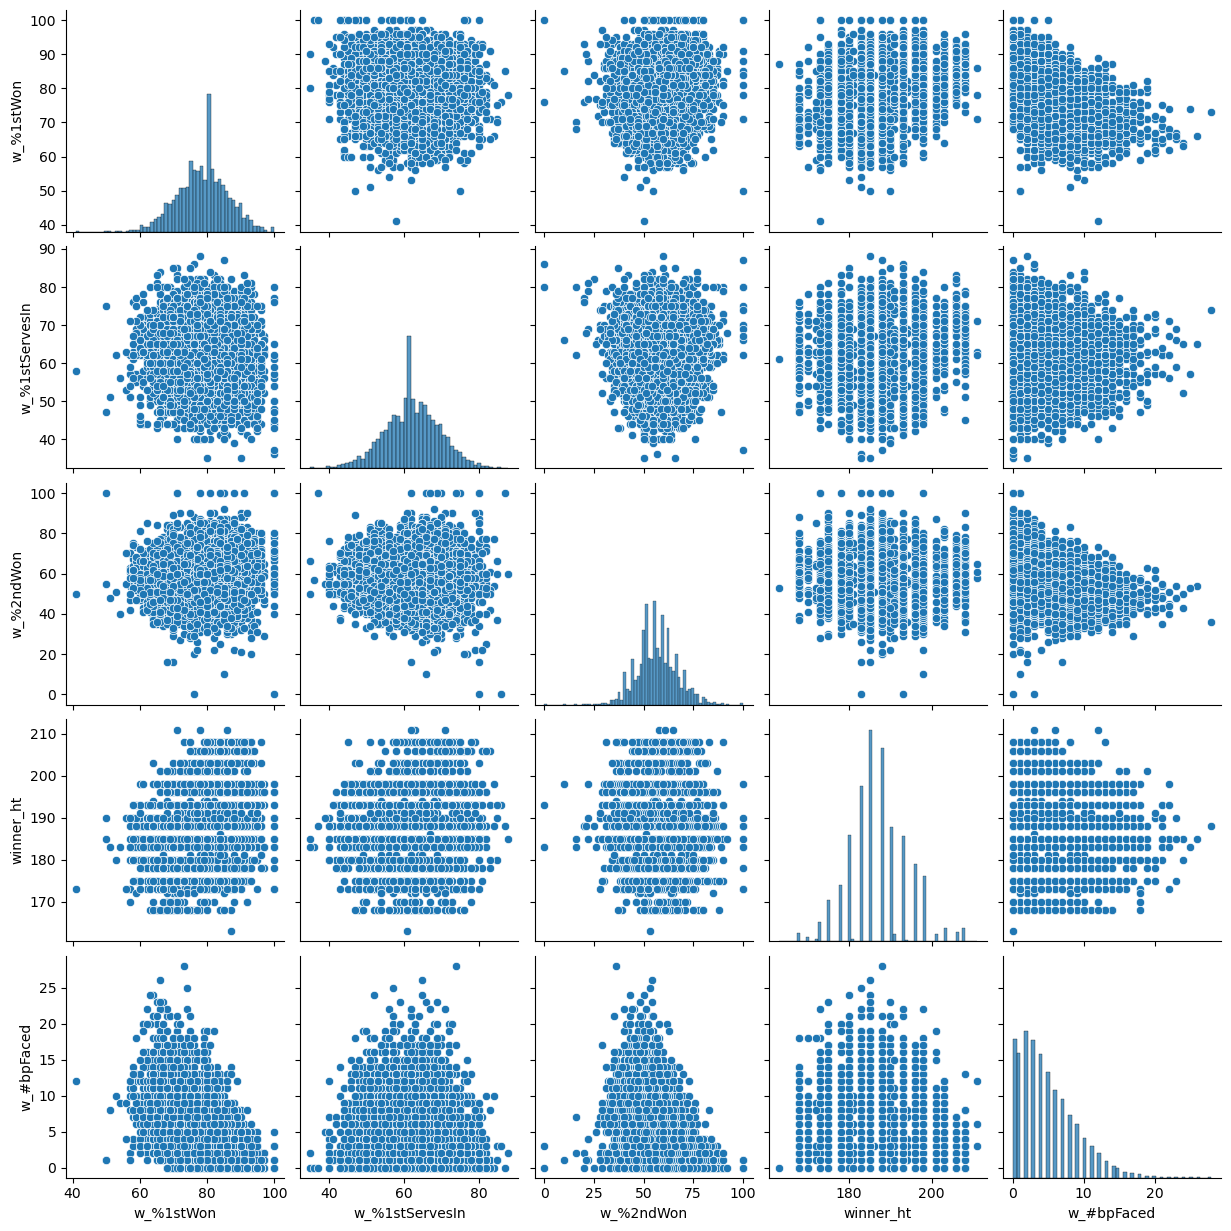

In [51]:
# Create a pair plot 

g = sns.pairplot(df_grass_pairplot)

### 3E. Categorical Plots

#### Using a categorical plot to compare winner and loser's stats on three variables each:
- points won on first serve
- points won on second serve
- percentage of first serves in play
- height

In [52]:
df_grass_1.describe()

winner_ht     loser_ht  w_#ServePoints  w_%1stServesIn    w_%1stWon  \
count  6817.000000  6782.000000     6836.000000     6836.000000  6836.000000   
mean    187.079067   185.984223       87.406671       62.330018    78.741223   
std       7.081148     6.869561       34.325511        7.343525     7.403465   
min     163.000000   168.000000        5.000000       35.000000    41.000000   
25%     183.000000   183.000000       62.000000       57.000000    74.000000   
50%     188.000000   185.000000       81.000000       62.000000    79.000000   
75%     190.000000   190.000000      106.000000       67.000000    84.000000   
max     211.000000   211.000000      491.000000       88.000000   100.000000   

         w_%2ndWon   w_#bpFaced  l_#ServePoints  l_%1stServesIn    l_%1stWon  \
count  6836.000000  6836.000000     6836.000000     6836.000000  6836.000000   
mean     56.862200     4.819046       91.438853       60.568607    68.546518   
std      10.101694     3.984152       34.469955        7.565745     8.900870   
min       0.000000     0.000000        5.000000       25.000000     0.000000   
25%      50.000000     2.000000       66.000000       56.000000    63.000000   
50%      56.000000     4.000000       86.000000       61.000000    69.000000   
75%      63.000000     7.000000      110.000000       66.000000    75.000000   
max     100.000000    28.000000      489.000000       90.000000   100.000000   

         l_%2ndWon   l_#bpFaced  
count  6836.000000  6836.000000  
mean     46.267554     8.536425  
std       9.845906     4.295486  
min       0.000000     0.000000  
25%      40.000000     5.000000  
50%      46.000000     8.000000  
75%      53.000000    11.000000  
max     100.000000    29.000000

### Percentage of first serve points won

##### The winner mean for first serve points won is about 10% more than the loser (78.7% to 68.5%)

<Axes: xlabel='w_%1stWon', ylabel='Count'>

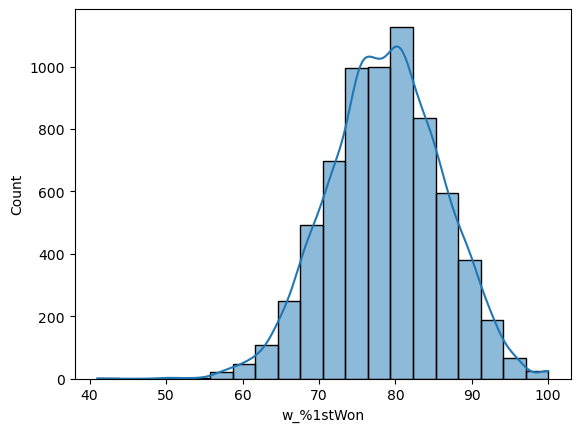

In [53]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_grass_1['w_%1stWon'], bins = 20, kde = True)

<Axes: xlabel='l_%1stWon', ylabel='Count'>

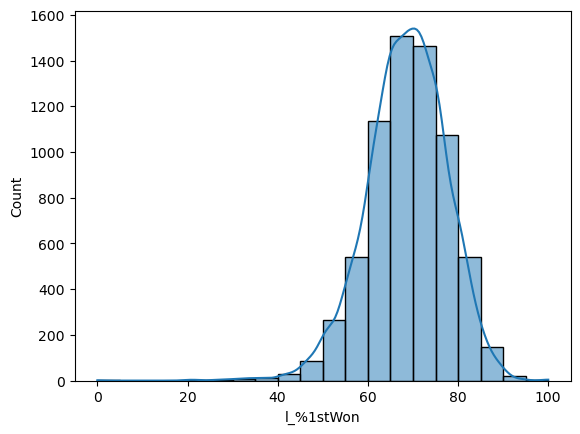

In [54]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_grass_1['l_%1stWon'], bins = 20, kde = True)

### Percentage of second serve points won

##### The winner mean for second serve points won is about 10% more than the loser (56.86% to 46.26%)

<Axes: xlabel='w_%2ndWon', ylabel='Count'>

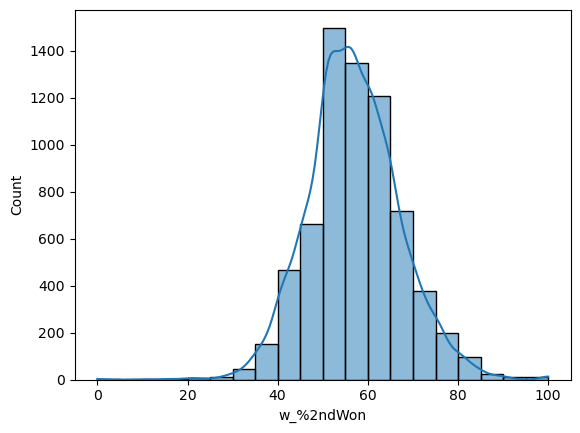

In [55]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_grass_1['w_%2ndWon'], bins = 20, kde = True)

<Axes: xlabel='l_%2ndWon', ylabel='Count'>

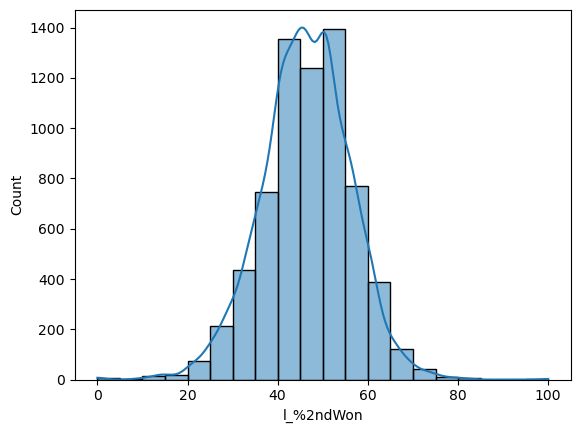

In [56]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_grass_1['l_%2ndWon'], bins = 20, kde = True)

### Height

##### 

<Axes: xlabel='winner_ht', ylabel='Count'>

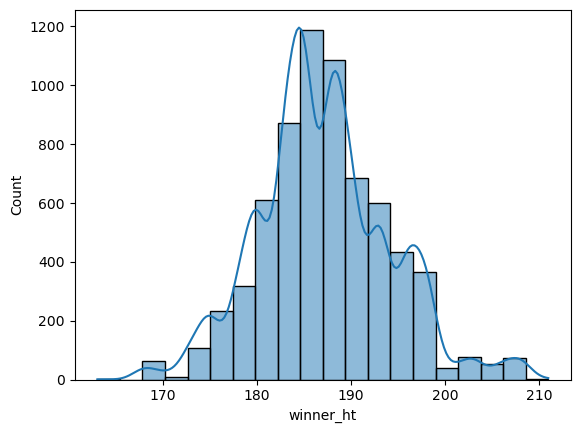

In [57]:
sns.histplot(df_grass_1['winner_ht'], bins = 20, kde = True)

<Axes: xlabel='loser_ht', ylabel='Count'>

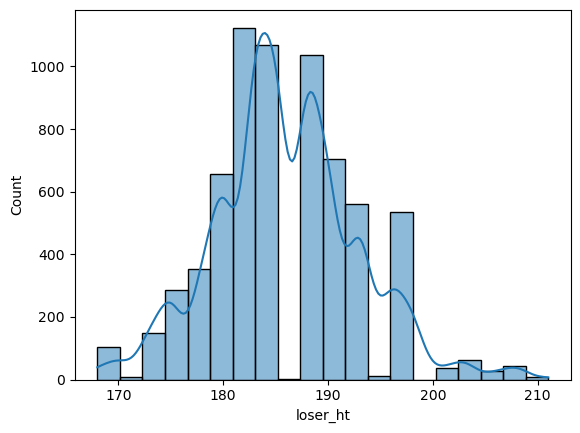

In [58]:
sns.histplot(df_grass_1['loser_ht'], bins = 20, kde = True)

### 3E. Insights

- On grass courts, both the winner and loser had a slightly higher percentage of points won on BOTH 1st and 2nd Serve Points
- On grass court, winner's 1st serve percentage was 1% higher (62%)
- Correlation between winner height and winner 1st serve points won is slightly stronger on grass court (.26 instead of .24)

## 4. df_clay

### 4a. Cleaning

In [59]:
#Import df_clay
df_clay = pd.read_pickle(os.path.join(path, 'Prepared Data','Subsets','df_clay.pkl'))

In [60]:
df_clay.head()

tourney_id  Year tourney_name surface tourney_level winner_id  \
119348   2000-306  2000  St. Poelten    Clay             A    102247   
119349   2000-306  2000  St. Poelten    Clay             A    102287   
119350   2000-306  2000  St. Poelten    Clay             A    102869   
119351   2000-306  2000  St. Poelten    Clay             A    103082   
119352   2000-306  2000  St. Poelten    Clay             A    102446   

       winner_ioc      winner_name  winner_age  winner_rank  winner_ht  \
119348        ITA  Andrea Gaudenzi        26.8         74.0      183.0   
119349        ESP    Albert Portas        26.5         71.0      188.0   
119350        ESP      Galo Blanco        23.6         70.0      173.0   
119351        GER  Markus Hantschk        22.5         94.0      188.0   
119352        UKR  Andrei Medvedev        25.7         21.0      193.0   

       loser_id loser_ioc       loser_name  loser_rank  loser_ht  loser_age  \
119348   103017       GER   Nicolas Kiefer         8.0     183.0       22.8   
119349   103242       ESP       Juan Giner       399.0     178.0       21.8   
119350   102987       BRA         Andre Sa        86.0     185.0       23.0   
119351   103819       SUI    Roger Federer        54.0     185.0       18.7   
119352   102795       USA  Scott Humphries       720.0     185.0       23.9   

       best_of round  minutes  w_#ServeGames  w_#aces  w_#dfs  w_#ServePoints  \
119348       3   R32     76.0            8.0      1.0     3.0            50.0   
119349       3   R32     87.0           13.0      4.0     6.0            74.0   
119350       3   R32     36.0            5.0      1.0     0.0            21.0   
119351       3   R32     54.0            7.0      0.0     0.0            36.0   
119352       3   R32    122.0           15.0      5.0     5.0           108.0   

        w_#1stServesIn  w_#2ndServePoints  w_%1stServesIn  w_#1stWon  \
119348            35.0               15.0              70       19.0   
119349            35.0               39.0              47       26.0   
119350            12.0                9.0              57        7.0   
119351            17.0               19.0              47       14.0   
119352            69.0               39.0              63       46.0   

        w_%1stWon  w_#2ndWon  w_%2ndWon  w_bpSaved  w_#bpFaced  l_#ServeGames  \
119348         54        8.0         53        4.0         8.0            8.0   
119349         74       22.0         56        2.0         5.0           12.0   
119350         58        7.0         77        0.0         1.0            4.0   
119351         82       15.0         78        0.0         0.0            8.0   
119352         66       18.0         46        7.0        12.0           16.0   

        l_#aces  l_#dfs  l_#ServePoints  l_#1stServesIn  l_#2ndServePoints  \
119348      0.0     4.0            53.0            24.0               29.0   
119349      0.0     2.0            71.0            46.0               25.0   
119350      0.0     3.0            25.0            11.0               14.0   
119351      2.0     2.0            64.0            36.0               28.0   
119352      4.0     4.0           104.0            67.0               37.0   

        l_%1stServesIn  l_#1stWon  l_%1stWon  l_#2ndWon  l_%2ndWon  l_bpSaved  \
119348              45       11.0         45       12.0         41        5.0   
119349              64       22.0         47       13.0         52        3.0   
119350              44        4.0         36        4.0         28        0.0   
119351              56       19.0         52       10.0         35        6.0   
119352              64       45.0         67       12.0         32        4.0   

        l_#bpFaced  
119348        10.0  
119349         9.0  
119350         4.0  
119351        11.0  
119352        10.0

In [61]:
df_clay.shape

(20073, 46)

### 4b. Correlation Heatmap

In [62]:
#create subset: drop irrelevant variables (same as in Section 2B for df_matchstats)

df_clay_1 = df_clay.drop(columns = ['tourney_id',
                                  'Year',
                                  'tourney_name',
                                  'surface',
                                  'tourney_level',
                                  'winner_id',
                                  'winner_name',
                                  'winner_ioc',
                                  'winner_age',
                                  'winner_rank',
                                  'loser_id', 
                                  'loser_name',
                                  'loser_ioc',
                                  'loser_rank',
                                  'loser_age',
                                  'best_of',
                                  'round',
                                  'minutes',
                                  'w_#ServeGames', 
                                  'w_#aces',
                                  'w_#dfs',
                                  'w_#1stServesIn',
                                  'w_#2ndServePoints',
                                  'w_#1stWon',
                                  'w_#2ndWon',
                                  'w_bpSaved',
                                  'l_#ServeGames',
                                  'l_#aces',
                                  'l_#dfs',
                                  'l_#1stServesIn', 
                                  'l_#2ndServePoints', 
                                  'l_#1stWon',
                                  'l_#2ndWon',
                                  'l_bpSaved'])

In [63]:
df_clay_1.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  20020.000000  19844.000000    20073.000000    20073.000000   
mean     185.130420    184.999194       76.044438       61.667514   
std        6.370665      6.509062       28.017697        8.727625   
min      168.000000    168.000000        4.000000       12.000000   
25%      180.000000    180.000000       55.000000       56.000000   
50%      185.000000    185.000000       71.000000       62.000000   
75%      188.000000    188.000000       92.000000       67.000000   
max      211.000000    211.000000      244.000000       98.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  20073.000000  20073.000000  20073.000000    20073.000000   
mean      73.638719     55.755941      5.572311       78.828974   
std        8.181243     10.740056      4.201869       27.999409   
min       33.000000      0.000000      0.000000        4.000000   
25%       68.000000     49.000000      2.000000       58.000000   
50%       73.000000     55.000000      5.000000       74.000000   
75%       79.000000     62.000000      8.000000       95.000000   
max      100.000000    129.000000     30.000000      252.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon   l_#bpFaced  
count    20073.000000  20073.000000  20073.000000  20073.00000  
mean        59.816171     62.349076     43.888756      9.25761  
std          8.743345      9.457181     10.360243      4.19578  
min         17.000000      0.000000      0.000000      0.00000  
25%         54.000000     57.000000     37.000000      6.00000  
50%         60.000000     63.000000     44.000000      9.00000  
75%         66.000000     69.000000     51.000000     12.00000  
max         97.000000    100.000000    100.000000     34.00000

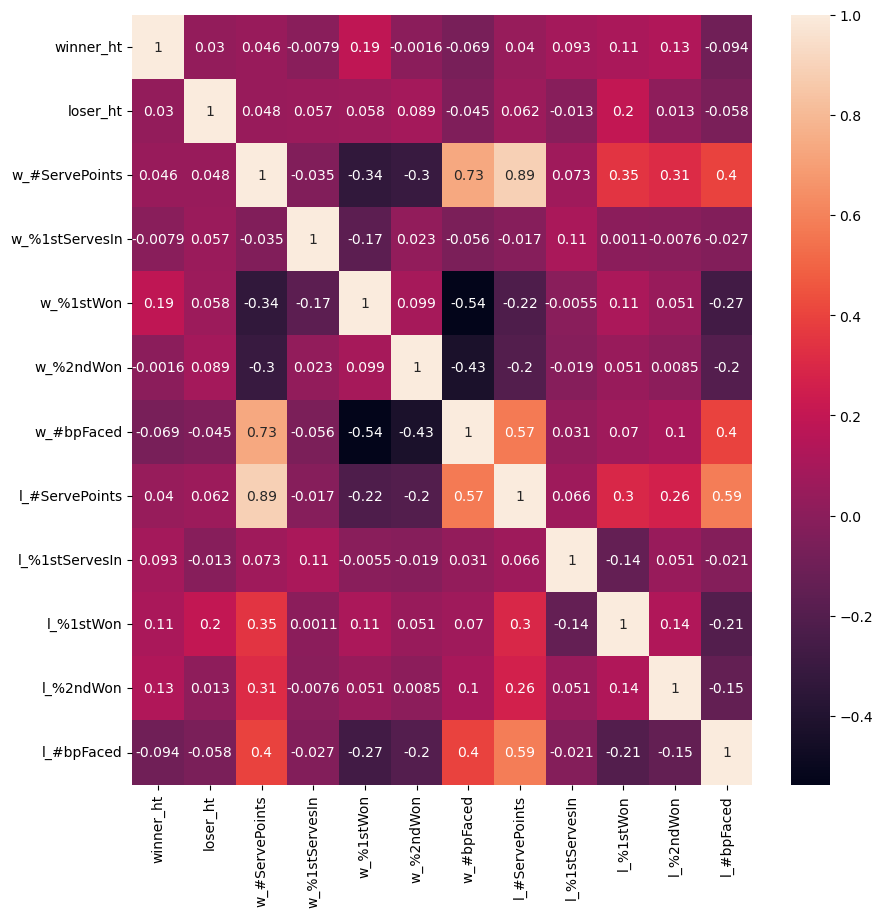

In [64]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_clay_1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### 4C. Scatterplots

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


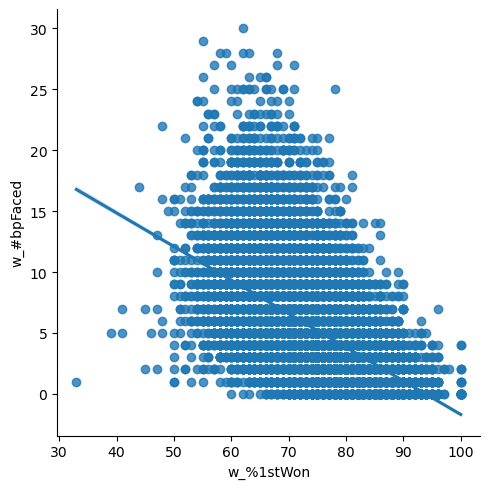

In [65]:
# Create a scatterplot for the "w_%1stWon" and "w_#bpFaced" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'w_#bpFaced', data = df_clay_1)

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


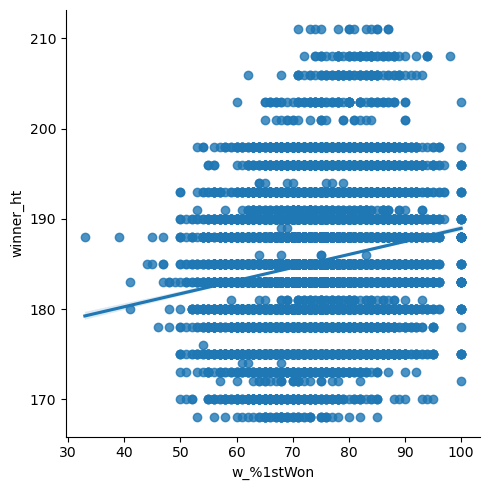

In [66]:
# Create a scatterplot for the "w_%1stWon" and "w_#bpFaced" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'winner_ht', data = df_clay_1)

### 4D. Pairplot

In [67]:
# Keep only the variables you want to use in the pair plot

df_clay_pairplot = df_clay_1[['w_%1stWon', 'w_%1stServesIn', 'w_%2ndWon','winner_ht','w_#bpFaced']]

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


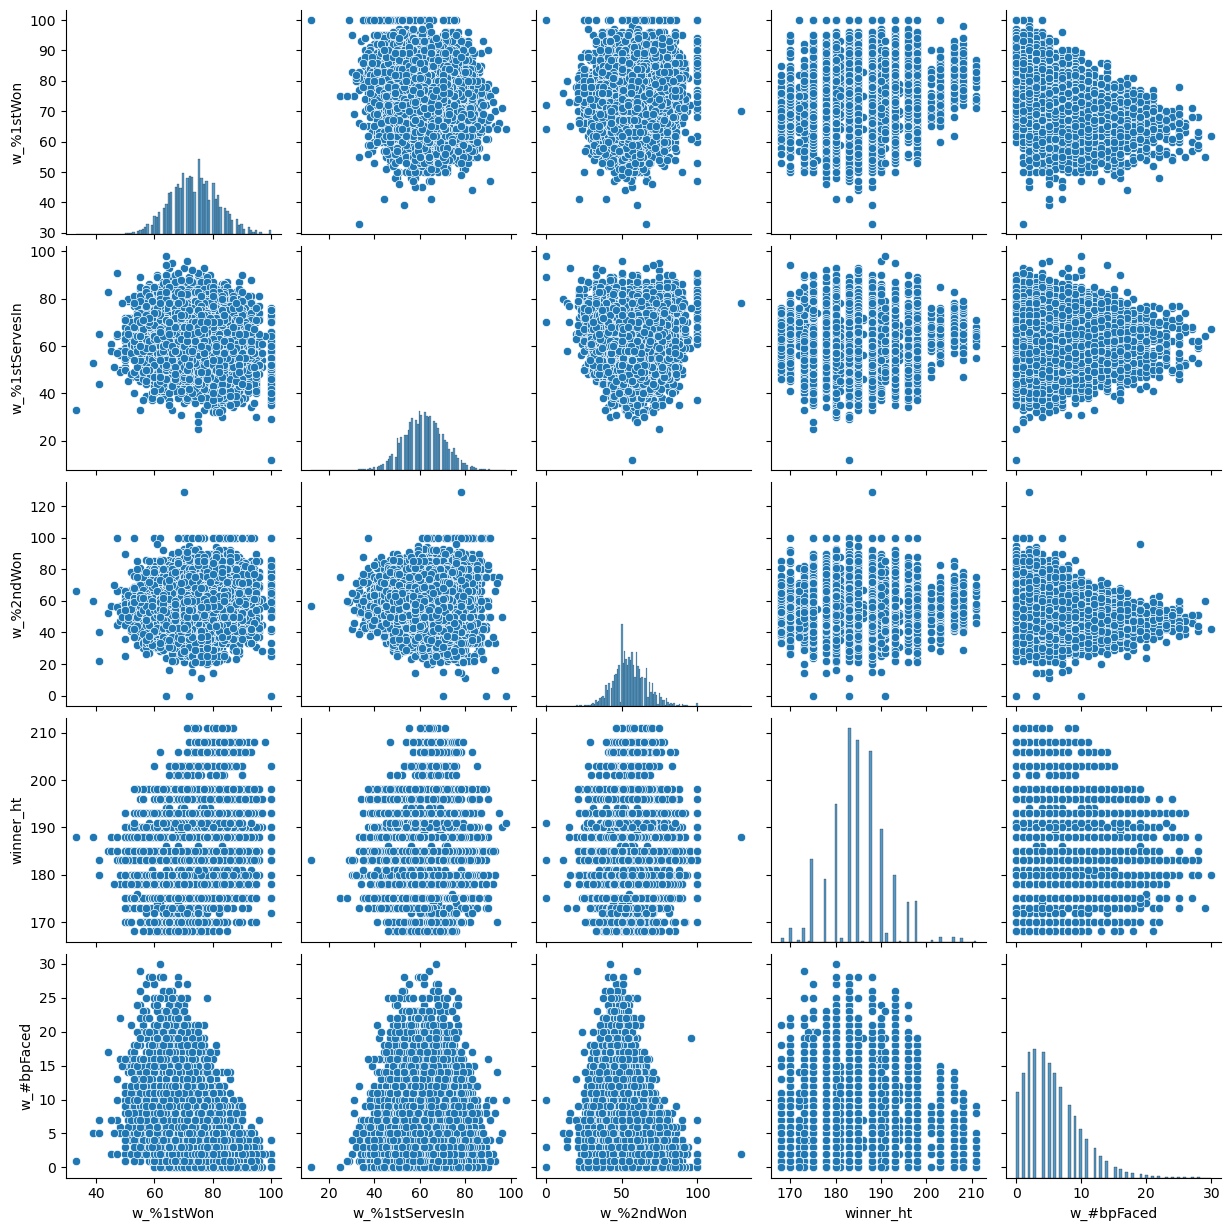

In [68]:
# Create a pair plot 

g = sns.pairplot(df_clay_pairplot)

### 4E. Categorical Plots

#### Using a categorical plot to compare winner and loser's stats on three variables each:
- points won on first serve
- points won on second serve
- percentage of first serves in play
- height

### Percentage of first serve points won

##### The winner mean for first serve points is about 10% higher (peak is in the 70-75% bin, while for the loser it's at the 60-65% bin)

<Axes: xlabel='w_%1stWon', ylabel='Count'>

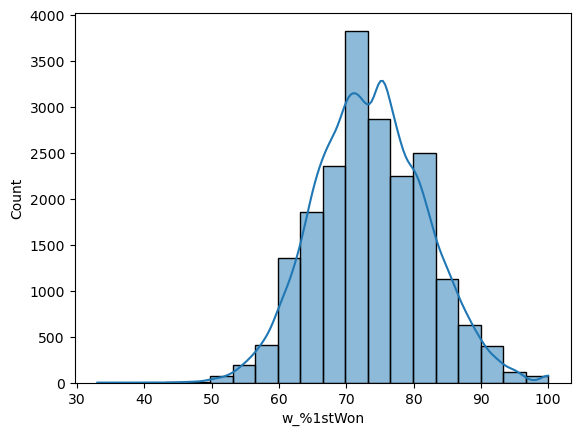

In [69]:
# Winner 1st Serve Points Won 

sns.histplot(df_clay_1['w_%1stWon'], bins = 20, kde = True)

<Axes: xlabel='l_%1stWon', ylabel='Count'>

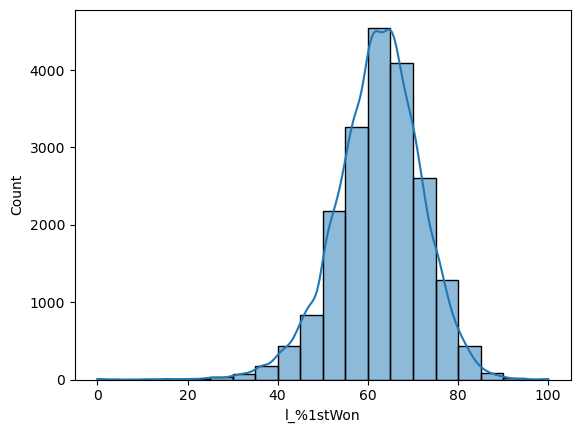

In [70]:
# Loser 1st Serve Points Won 

sns.histplot(df_clay_1['l_%1stWon'], bins = 20, kde = True)

### Percentage of second serve points won

##### The winner mean for second serve points won is about 10% more than the loser (winner peak is in 50-55% bin; loser is 40-45%)

<Axes: xlabel='w_%2ndWon', ylabel='Count'>

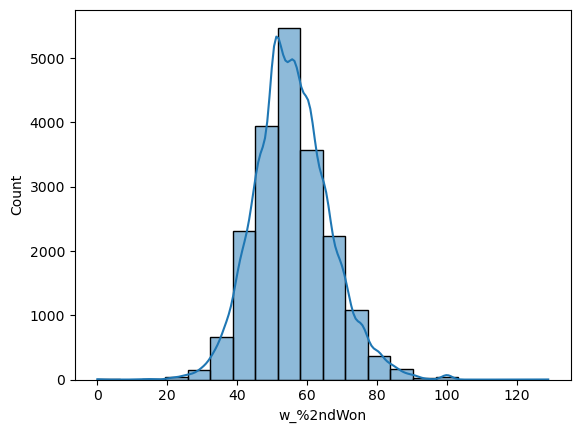

In [71]:
# Winner 2nd Serve Points Won 

sns.histplot(df_clay_1['w_%2ndWon'], bins = 20, kde = True)

<Axes: xlabel='l_%2ndWon', ylabel='Count'>

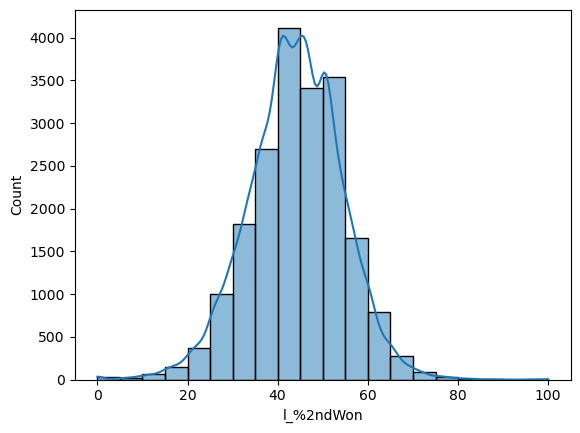

In [72]:
# Loser 2nd Serve Points Won 

sns.histplot(df_clay_1['l_%2ndWon'], bins = 20, kde = True)

### First Serve Percentage

<Axes: xlabel='w_%1stServesIn', ylabel='Count'>

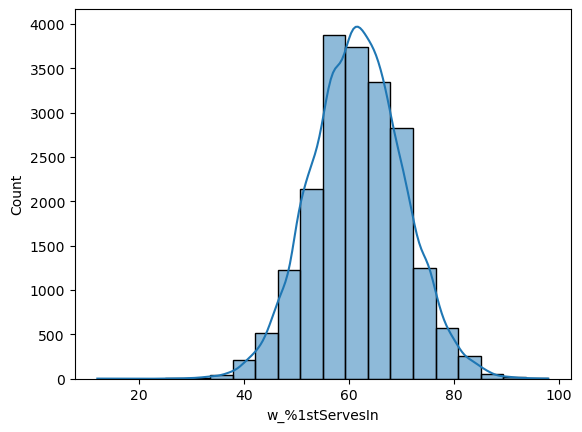

In [73]:
# Winner 1st Serve Percentage

sns.histplot(df_clay_1['w_%1stServesIn'], bins = 20, kde = True)

<Axes: xlabel='l_%1stServesIn', ylabel='Count'>

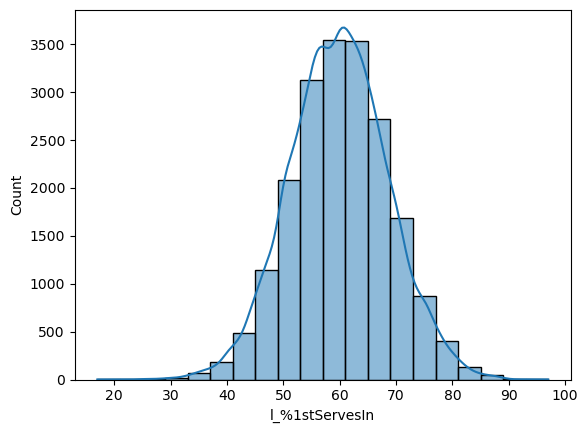

In [74]:
# Loser 1st Serve Percentage

sns.histplot(df_clay_1['l_%1stServesIn'], bins = 20, kde = True)

#### Height

No clear difference between height.

<Axes: xlabel='winner_ht', ylabel='Count'>

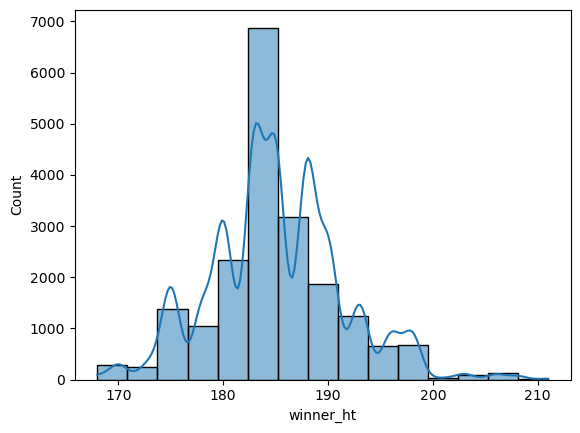

In [75]:
#Winner Height

sns.histplot(df_clay_1['winner_ht'], bins = 15, kde = True)

<Axes: xlabel='loser_ht', ylabel='Count'>

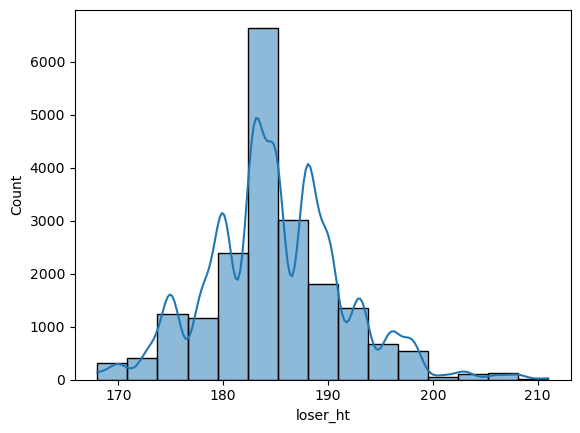

In [76]:
#Loser Height

sns.histplot(df_clay_1['loser_ht'], bins = 15, kde = True)

### 4e. Insights

- On clay courts, both the winner and loser had a lower percentage of points won on BOTH 1st and 2nd Serve Points (73.6% and 55.76% for winner; 62.34% for 43.89% for loser); the difference was more striking in 1st serve points won
- Correlation between winner height and winner 1st serve points won is slightly weaker on clay court (.19 instead of .24)
- Winner 1st serve percentage = 62.3%; Loser 1st serve percentage = 60.57%; 

## 5. df_hard

### 5a. Cleaning

In [89]:
#Import df_hard
df_hard = pd.read_pickle(os.path.join(path, 'Prepared Data','Subsets','df_hard.pkl'))

In [90]:
df_hard.head()

tourney_id  Year tourney_name surface tourney_level winner_id  \
119317   2000-301  2000     Auckland    Hard             A    103163   
119318   2000-301  2000     Auckland    Hard             A    102607   
119319   2000-301  2000     Auckland    Hard             A    103252   
119320   2000-301  2000     Auckland    Hard             A    103507   
119321   2000-301  2000     Auckland    Hard             A    102103   

       winner_ioc          winner_name  winner_age  winner_rank  winner_ht  \
119317        GER           Tommy Haas        21.7         11.0      188.0   
119318        ESP        Juan Balcells        24.5        211.0      190.0   
119319        ESP       Alberto Martin        21.3         48.0      175.0   
119320        ESP  Juan Carlos Ferrero        19.9         45.0      183.0   
119321        USA         Michael Sell        27.3        167.0      180.0   

       loser_id loser_ioc           loser_name  loser_rank  loser_ht  \
119317   101543       USA         Jeff Tarango        63.0     180.0   
119318   102644       ARG     Franco Squillari        49.0     183.0   
119319   102238       ESP  Alberto Berasategui        59.0     173.0   
119320   103819       SUI        Roger Federer        61.0     185.0   
119321   102765       FRA       Nicolas Escude        34.0     185.0   

        loser_age best_of round  minutes  w_#ServeGames  w_#aces  w_#dfs  \
119317       31.1       3   R32    108.0           17.0     18.0     4.0   
119318       24.3       3   R32     85.0           12.0      5.0     3.0   
119319       26.5       3   R32     56.0            8.0      0.0     0.0   
119320       18.4       3   R32     68.0           10.0      5.0     1.0   
119321       23.7       3   R32    115.0           13.0      1.0     2.0   

        w_#ServePoints  w_#1stServesIn  w_#2ndServePoints  w_%1stServesIn  \
119317            96.0            49.0               47.0              51   
119318            76.0            52.0               24.0              68   
119319            55.0            35.0               20.0              63   
119320            53.0            28.0               25.0              52   
119321            98.0            66.0               32.0              67   

        w_#1stWon  w_%1stWon  w_#2ndWon  w_%2ndWon  w_bpSaved  w_#bpFaced  \
119317       39.0         79       28.0         59        3.0         5.0   
119318       39.0         75       13.0         54        5.0         6.0   
119319       25.0         71       12.0         60        1.0         1.0   
119320       26.0         92       15.0         60        0.0         0.0   
119321       39.0         59       14.0         43        6.0        11.0   

        l_#ServeGames  l_#aces  l_#dfs  l_#ServePoints  l_#1stServesIn  \
119317           17.0      7.0     8.0           106.0            55.0   
119318           12.0      5.0    10.0            74.0            32.0   
119319            8.0      0.0     6.0            56.0            33.0   
119320           10.0     11.0     2.0            70.0            43.0   
119321           12.0      8.0     8.0            92.0            46.0   

        l_#2ndServePoints  l_%1stServesIn  l_#1stWon  l_%1stWon  l_#2ndWon  \
119317               51.0              51       39.0         70       29.0   
119318               42.0              43       25.0         78       18.0   
119319               23.0              58       20.0         60        7.0   
119320               27.0              61       29.0         67       14.0   
119321               46.0              50       34.0         73       18.0   

        l_%2ndWon  l_bpSaved  l_#bpFaced  
119317         56        4.0         7.0  
119318         42        3.0         6.0  
119319         30        7.0        11.0  
119320         51        6.0         8.0  
119321         39        5.0         9.0

In [91]:
df_hard.shape

(34182, 46)

### 5b. Correlation Heatmap

In [92]:
#create subset: drop irrelevant variables (same as in Section 2B for df_matchstats)

df_hard_1 = df_hard.drop(columns = ['tourney_id',
                                  'Year',
                                  'tourney_name',
                                  'surface',
                                  'tourney_level',
                                  'winner_id',
                                  'winner_name',
                                  'winner_ioc',
                                  'winner_age',
                                  'winner_rank',
                                  'loser_id', 
                                  'loser_name',
                                  'loser_ioc',
                                  'loser_rank',
                                  'loser_age',
                                  'best_of',
                                  'round',
                                  'minutes',
                                  'w_#ServeGames', 
                                  'w_#aces',
                                  'w_#dfs',
                                  'w_#1stServesIn',
                                  'w_#2ndServePoints',
                                  'w_#1stWon',
                                  'w_#2ndWon',
                                  'w_bpSaved',
                                  'l_#ServeGames',
                                  'l_#aces',
                                  'l_#dfs',
                                  'l_#1stServesIn', 
                                  'l_#2ndServePoints', 
                                  'l_#1stWon',
                                  'l_#2ndWon',
                                  'l_bpSaved'])

In [93]:
df_hard_1.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  34060.000000  33748.000000    34182.000000    34182.000000   
mean     186.647270    185.917151       77.360277       60.485255   
std        6.976121      6.902803       28.544989        7.952685   
min      168.000000    163.000000        3.000000       15.000000   
25%      183.000000    183.000000       56.000000       55.000000   
50%      185.000000    185.000000       72.000000       60.000000   
75%      190.000000    190.000000       94.000000       66.000000   
max      211.000000    211.000000      257.000000       96.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  34182.000000  34182.000000  34182.000000    34182.000000   
mean      77.242701     56.355714      4.809198       80.392312   
std        7.857212     10.416001      3.932766       28.437073   
min        0.000000      0.000000      0.000000        3.000000   
25%       72.000000     50.000000      2.000000       60.000000   
50%       77.000000     56.000000      4.000000       75.000000   
75%       82.000000     63.000000      7.000000       96.000000   
max      100.000000    100.000000     30.000000      253.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon    l_#bpFaced  
count    34182.000000  34182.000000  34182.000000  34182.000000  
mean        58.532883     66.509537     45.108420      8.343602  
std          8.049950      9.463123     10.241112      4.056372  
min         12.000000      0.000000      0.000000      0.000000  
25%         53.000000     61.000000     39.000000      5.000000  
50%         59.000000     67.000000     45.000000      8.000000  
75%         64.000000     73.000000     52.000000     11.000000  
max         94.000000    100.000000    100.000000     38.000000

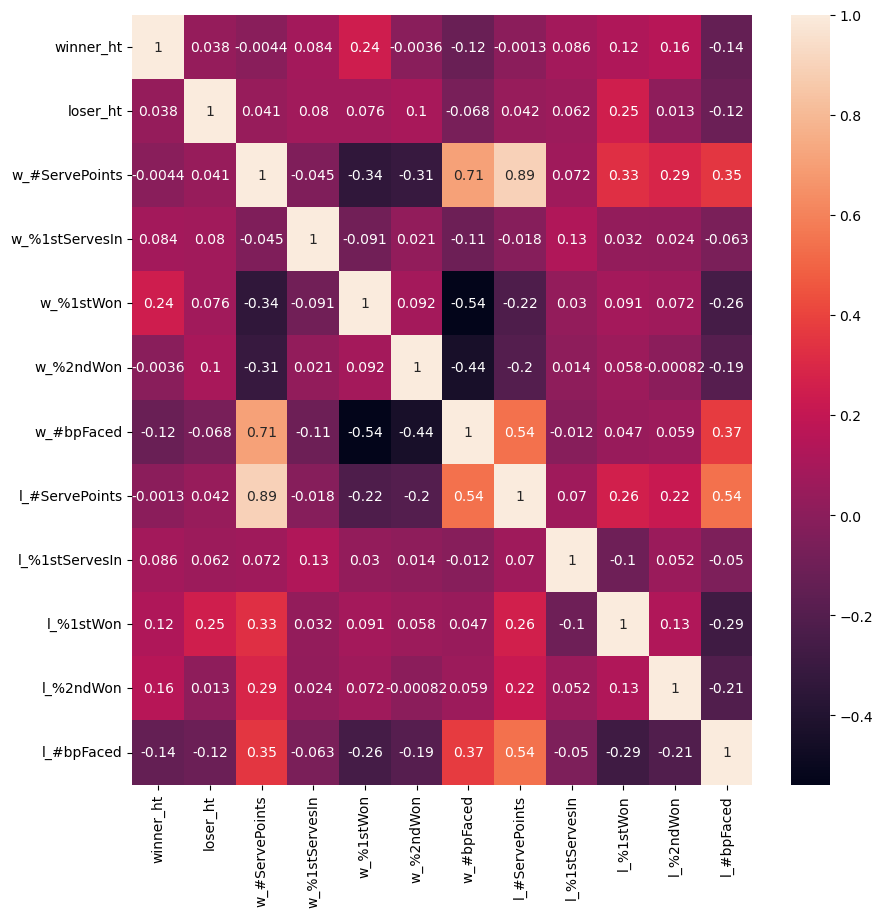

In [94]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_hard_1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### 5C. Scatterplots

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


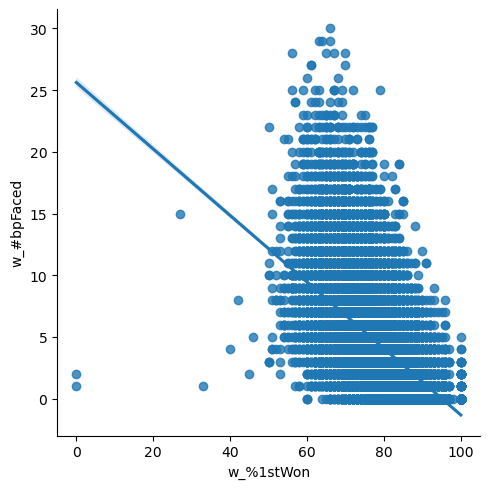

In [95]:
# Create a scatterplot for the "w_%1stWon" and "w_#bpFaced" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'w_#bpFaced', data = df_hard_1)

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


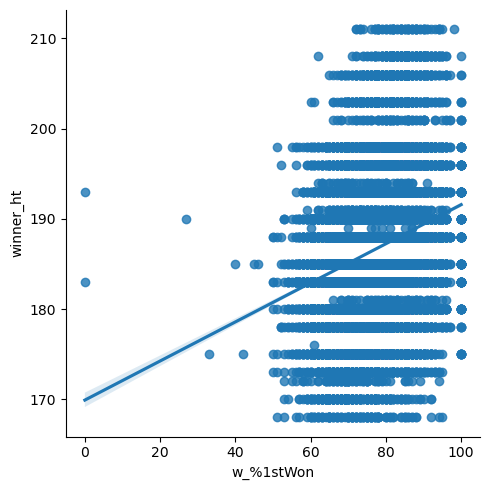

In [96]:
# Create a scatterplot for the "w_%1stWon" and "winner_ht" columns in seaborn

sns.lmplot(x = 'w_%1stWon', y = 'winner_ht', data = df_hard_1)

### 5d. Pairplot

In [97]:
# Keep only the variables you want to use in the pair plot

df_hard_pairplot = df_hard_1[['w_%1stWon', 'w_%1stServesIn', 'w_%2ndWon','winner_ht','w_#bpFaced']]

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


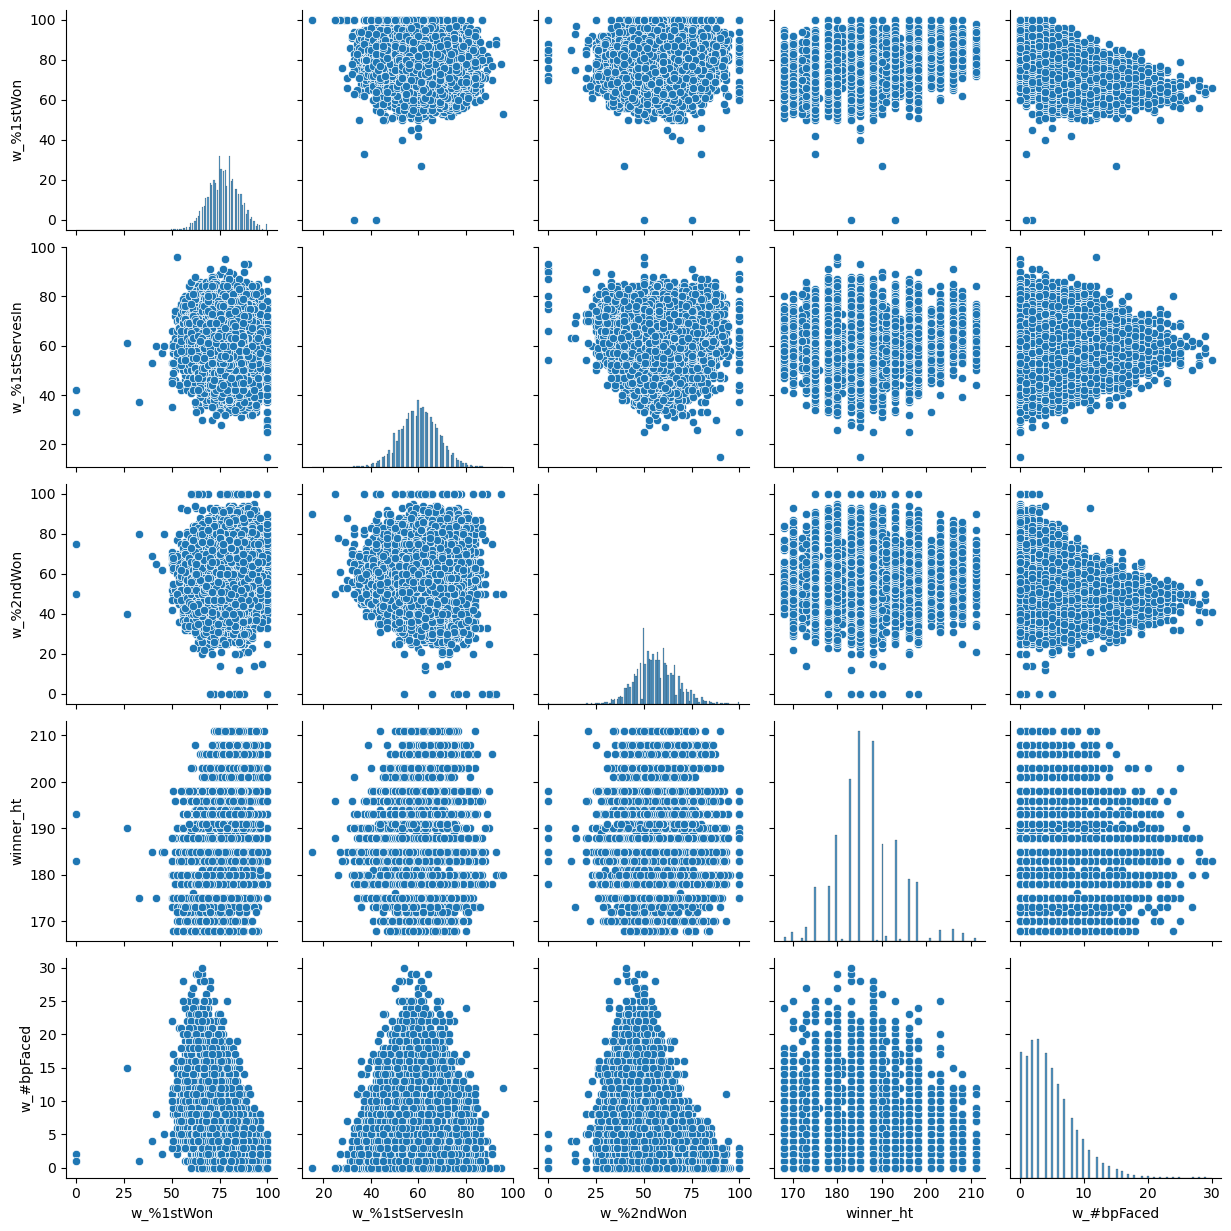

In [98]:
# Create a pair plot 

g = sns.pairplot(df_hard_pairplot)

### 5E. Categorical Plots

#### Using a categorical plot to compare winner and loser's stats on three variables each:
- points won on first serve
- points won on second serve
- percentage of first serves in play
- height

### Percentage of first serve points won

##### The winner mean for first serve points is about 10% higher (peak is in the 75-80% bin, while for the loser it's at the 65-70% bin)

<Axes: xlabel='w_%1stWon', ylabel='Count'>

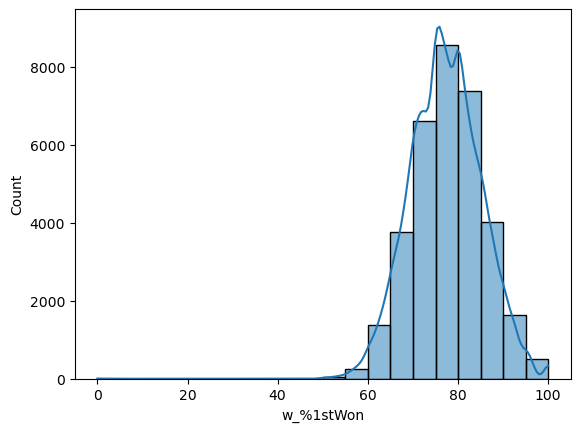

In [99]:
# Winner 1st Serve Points Won 

sns.histplot(df_hard_1['w_%1stWon'], bins = 20, kde = True)

<Axes: xlabel='l_%1stWon', ylabel='Count'>

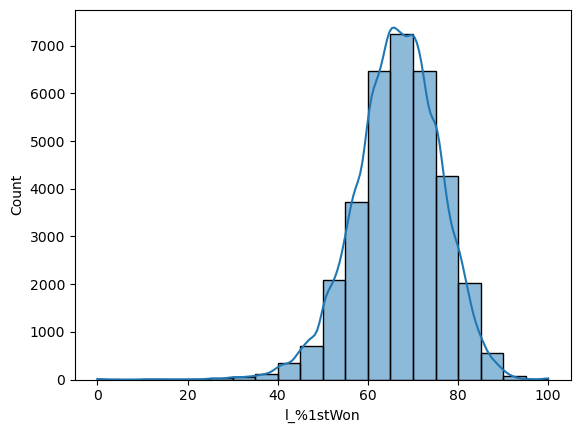

In [100]:
# Loser 1st Serve Points Won 

sns.histplot(df_hard_1['l_%1stWon'], bins = 20, kde = True)

## 6. Serve stat comparisons between surfaces

### 6A. Describe

In [101]:
df_matchstats2.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  62332.000000  61801.000000    62530.000000    62530.000000   
mean     186.182603    185.611317       77.922469       61.061427   
std        6.826430      6.776734       29.176144        8.180105   
min      163.000000    163.000000        3.000000       12.000000   
25%      183.000000    181.000000       56.000000       56.000000   
50%      185.000000    185.000000       73.000000       61.000000   
75%      190.000000    190.000000       94.000000       67.000000   
max      211.000000    211.000000      491.000000       98.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  62530.000000  62530.000000  62530.000000    62530.000000   
mean      76.289637     56.223413      5.038893       80.973885   
std        8.141773     10.496364      4.034177       29.154055   
min        0.000000      0.000000      0.000000        3.000000   
25%       71.000000     50.000000      2.000000       60.000000   
50%       76.000000     56.000000      4.000000       76.000000   
75%       82.000000     63.000000      7.000000       97.000000   
max      100.000000    129.000000     30.000000      489.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon    l_#bpFaced  
count    62530.000000  62530.000000  62530.000000  62530.000000  
mean        59.158452     65.442875     44.859332      8.630977  
std          8.272118      9.668002     10.276116      4.142344  
min         12.000000      0.000000      0.000000      0.000000  
25%         54.000000     60.000000     38.000000      6.000000  
50%         59.000000     66.000000     45.000000      8.000000  
75%         65.000000     72.000000     52.000000     11.000000  
max         97.000000    100.000000    100.000000     38.000000

In [102]:
df_grass_1.describe()

winner_ht     loser_ht  w_#ServePoints  w_%1stServesIn    w_%1stWon  \
count  6817.000000  6782.000000     6836.000000     6836.000000  6836.000000   
mean    187.079067   185.984223       87.406671       62.330018    78.741223   
std       7.081148     6.869561       34.325511        7.343525     7.403465   
min     163.000000   168.000000        5.000000       35.000000    41.000000   
25%     183.000000   183.000000       62.000000       57.000000    74.000000   
50%     188.000000   185.000000       81.000000       62.000000    79.000000   
75%     190.000000   190.000000      106.000000       67.000000    84.000000   
max     211.000000   211.000000      491.000000       88.000000   100.000000   

         w_%2ndWon   w_#bpFaced  l_#ServePoints  l_%1stServesIn    l_%1stWon  \
count  6836.000000  6836.000000     6836.000000     6836.000000  6836.000000   
mean     56.862200     4.819046       91.438853       60.568607    68.546518   
std      10.101694     3.984152       34.469955        7.565745     8.900870   
min       0.000000     0.000000        5.000000       25.000000     0.000000   
25%      50.000000     2.000000       66.000000       56.000000    63.000000   
50%      56.000000     4.000000       86.000000       61.000000    69.000000   
75%      63.000000     7.000000      110.000000       66.000000    75.000000   
max     100.000000    28.000000      489.000000       90.000000   100.000000   

         l_%2ndWon   l_#bpFaced  
count  6836.000000  6836.000000  
mean     46.267554     8.536425  
std       9.845906     4.295486  
min       0.000000     0.000000  
25%      40.000000     5.000000  
50%      46.000000     8.000000  
75%      53.000000    11.000000  
max     100.000000    29.000000

In [103]:
df_clay_1.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  20020.000000  19844.000000    20073.000000    20073.000000   
mean     185.130420    184.999194       76.044438       61.667514   
std        6.370665      6.509062       28.017697        8.727625   
min      168.000000    168.000000        4.000000       12.000000   
25%      180.000000    180.000000       55.000000       56.000000   
50%      185.000000    185.000000       71.000000       62.000000   
75%      188.000000    188.000000       92.000000       67.000000   
max      211.000000    211.000000      244.000000       98.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  20073.000000  20073.000000  20073.000000    20073.000000   
mean      73.638719     55.755941      5.572311       78.828974   
std        8.181243     10.740056      4.201869       27.999409   
min       33.000000      0.000000      0.000000        4.000000   
25%       68.000000     49.000000      2.000000       58.000000   
50%       73.000000     55.000000      5.000000       74.000000   
75%       79.000000     62.000000      8.000000       95.000000   
max      100.000000    129.000000     30.000000      252.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon   l_#bpFaced  
count    20073.000000  20073.000000  20073.000000  20073.00000  
mean        59.816171     62.349076     43.888756      9.25761  
std          8.743345      9.457181     10.360243      4.19578  
min         17.000000      0.000000      0.000000      0.00000  
25%         54.000000     57.000000     37.000000      6.00000  
50%         60.000000     63.000000     44.000000      9.00000  
75%         66.000000     69.000000     51.000000     12.00000  
max         97.000000    100.000000    100.000000     34.00000

In [104]:
df_hard_1.describe()

winner_ht      loser_ht  w_#ServePoints  w_%1stServesIn  \
count  34060.000000  33748.000000    34182.000000    34182.000000   
mean     186.647270    185.917151       77.360277       60.485255   
std        6.976121      6.902803       28.544989        7.952685   
min      168.000000    163.000000        3.000000       15.000000   
25%      183.000000    183.000000       56.000000       55.000000   
50%      185.000000    185.000000       72.000000       60.000000   
75%      190.000000    190.000000       94.000000       66.000000   
max      211.000000    211.000000      257.000000       96.000000   

          w_%1stWon     w_%2ndWon    w_#bpFaced  l_#ServePoints  \
count  34182.000000  34182.000000  34182.000000    34182.000000   
mean      77.242701     56.355714      4.809198       80.392312   
std        7.857212     10.416001      3.932766       28.437073   
min        0.000000      0.000000      0.000000        3.000000   
25%       72.000000     50.000000      2.000000       60.000000   
50%       77.000000     56.000000      4.000000       75.000000   
75%       82.000000     63.000000      7.000000       96.000000   
max      100.000000    100.000000     30.000000      253.000000   

       l_%1stServesIn     l_%1stWon     l_%2ndWon    l_#bpFaced  
count    34182.000000  34182.000000  34182.000000  34182.000000  
mean        58.532883     66.509537     45.108420      8.343602  
std          8.049950      9.463123     10.241112      4.056372  
min         12.000000      0.000000      0.000000      0.000000  
25%         53.000000     61.000000     39.000000      5.000000  
50%         59.000000     67.000000     45.000000      8.000000  
75%         64.000000     73.000000     52.000000     11.000000  
max         94.000000    100.000000    100.000000     38.000000

### MEANS (Averages)
- Player Height
- - Winner: Grass (187); Clay (185.1); Hard (186.6); Overall (186.2)
- - Loser: Grass (186); Clay (185); Hard (186); Overall (185.6)
- First Serve Points Won
- - Winner: Grass (78.7%); Clay (73.6%); Hard (77.2%); Overall (76.3%)
- - Loser: Grass (68.5%); Clay (62.3%); Hard (66.5%); Overall (65.4%)
- Second Serve Points Won
- - Winner: Grass (56.9%); Clay (55.8%); Hard (56.4%); Overall (56.2%)
- - Loser: Grass (46.3%); Clay (43.9%); Hard (45.1%); Overall (44.9%)
- First Serve Percentage
- - Winner: Grass (62.3%); Clay (61.7%); Hard (60.5%); Overall (61.1%)
- - Loser: Grass (60.6%); Clay (59.8%); Hard (58.5%); Overall (59.2%)

### 6B. Correlations

In [105]:
df_matchstats2.corr()

winner_ht  loser_ht  w_#ServePoints  w_%1stServesIn  \
winner_ht        1.000000  0.037679        0.017224        0.052805   
loser_ht         0.037679  1.000000        0.048769        0.069664   
w_#ServePoints   0.017224  0.048769        1.000000       -0.027921   
w_%1stServesIn   0.052805  0.069664       -0.027921        1.000000   
w_%1stWon        0.243258  0.079533       -0.309007       -0.119355   
w_%2ndWon        0.002183  0.100311       -0.295374        0.020770   
w_#bpFaced      -0.114588 -0.064639        0.695912       -0.084087   
l_#ServePoints   0.020137  0.052015        0.895547       -0.004547   
l_%1stServesIn   0.081136  0.037671        0.082115        0.133483   
l_%1stWon        0.136850  0.243651        0.338109        0.015004   
l_%2ndWon        0.155991  0.019303        0.298660        0.016376   
l_#bpFaced      -0.132425 -0.104471        0.357073       -0.040737   

                w_%1stWon  w_%2ndWon  w_#bpFaced  l_#ServePoints  \
winner_ht        0.243258   0.002183   -0.114588        0.020137   
loser_ht         0.079533   0.100311   -0.064639        0.052015   
w_#ServePoints  -0.309007  -0.295374    0.695912        0.895547   
w_%1stServesIn  -0.119355   0.020770   -0.084087       -0.004547   
w_%1stWon        1.000000   0.099308   -0.542303       -0.191943   
w_%2ndWon        0.099308   1.000000   -0.435163       -0.186898   
w_#bpFaced      -0.542303  -0.435163    1.000000        0.535436   
l_#ServePoints  -0.191943  -0.186898    0.535436        1.000000   
l_%1stServesIn   0.009192   0.004198    0.009705        0.078052   
l_%1stWon        0.146542   0.060460    0.033481        0.274515   
l_%2ndWon        0.081009   0.004738    0.066245        0.237610   
l_#bpFaced      -0.272246  -0.192632    0.383094        0.538083   

                l_%1stServesIn  l_%1stWon  l_%2ndWon  l_#bpFaced  
winner_ht             0.081136   0.136850   0.155991   -0.132425  
loser_ht              0.037671   0.243651   0.019303   -0.104471  
w_#ServePoints        0.082115   0.338109   0.298660    0.357073  
w_%1stServesIn        0.133483   0.015004   0.016376   -0.040737  
w_%1stWon             0.009192   0.146542   0.081009   -0.272246  
w_%2ndWon             0.004198   0.060460   0.004738   -0.192632  
w_#bpFaced            0.009705   0.033481   0.066245    0.383094  
l_#ServePoints        0.078052   0.274515   0.237610    0.538083  
l_%1stServesIn        1.000000  -0.116941   0.050998   -0.032449  
l_%1stWon            -0.116941   1.000000   0.148788   -0.275644  
l_%2ndWon             0.050998   0.148788   1.000000   -0.197480  
l_#bpFaced           -0.032449  -0.275644  -0.197480    1.000000

In [106]:
df_grass_1.corr()

winner_ht  loser_ht  w_#ServePoints  w_%1stServesIn  \
winner_ht        1.000000  0.006244       -0.005662        0.124376   
loser_ht         0.006244  1.000000        0.056460        0.084245   
w_#ServePoints  -0.005662  0.056460        1.000000        0.019616   
w_%1stServesIn   0.124376  0.084245        0.019616        1.000000   
w_%1stWon        0.261248  0.064042       -0.300581       -0.068453   
w_%2ndWon        0.004202  0.101708       -0.253112        0.010541   
w_#bpFaced      -0.138828 -0.066685        0.670997       -0.098495   
l_#ServePoints   0.007048  0.043670        0.915918        0.039883   
l_%1stServesIn   0.076158  0.081436        0.114744        0.164428   
l_%1stWon        0.115535  0.256706        0.328051        0.050197   
l_%2ndWon        0.170046  0.031538        0.279062        0.065623   
l_#bpFaced      -0.145229 -0.128447        0.354973       -0.047931   

                w_%1stWon  w_%2ndWon  w_#bpFaced  l_#ServePoints  \
winner_ht        0.261248   0.004202   -0.138828        0.007048   
loser_ht         0.064042   0.101708   -0.066685        0.043670   
w_#ServePoints  -0.300581  -0.253112    0.670997        0.915918   
w_%1stServesIn  -0.068453   0.010541   -0.098495        0.039883   
w_%1stWon        1.000000   0.088274   -0.542164       -0.181710   
w_%2ndWon        0.088274   1.000000   -0.412640       -0.147324   
w_#bpFaced      -0.542164  -0.412640    1.000000        0.527910   
l_#ServePoints  -0.181710  -0.147324    0.527910        1.000000   
l_%1stServesIn   0.037119   0.029679    0.000065        0.110758   
l_%1stWon        0.090322   0.042829    0.061584        0.242047   
l_%2ndWon        0.093341  -0.003729    0.053923        0.210288   
l_#bpFaced      -0.224454  -0.152651    0.354590        0.530034   

                l_%1stServesIn  l_%1stWon  l_%2ndWon  l_#bpFaced  
winner_ht             0.076158   0.115535   0.170046   -0.145229  
loser_ht              0.081436   0.256706   0.031538   -0.128447  
w_#ServePoints        0.114744   0.328051   0.279062    0.354973  
w_%1stServesIn        0.164428   0.050197   0.065623   -0.047931  
w_%1stWon             0.037119   0.090322   0.093341   -0.224454  
w_%2ndWon             0.029679   0.042829  -0.003729   -0.152651  
w_#bpFaced            0.000065   0.061584   0.053923    0.354590  
l_#ServePoints        0.110758   0.242047   0.210288    0.530034  
l_%1stServesIn        1.000000  -0.093754   0.056072   -0.042386  
l_%1stWon            -0.093754   1.000000   0.146278   -0.299140  
l_%2ndWon             0.056072   0.146278   1.000000   -0.222104  
l_#bpFaced           -0.042386  -0.299140  -0.222104    1.000000

In [107]:
df_clay_1.corr()

winner_ht  loser_ht  w_#ServePoints  w_%1stServesIn  \
winner_ht        1.000000  0.029981        0.045602       -0.007936   
loser_ht         0.029981  1.000000        0.047582        0.057077   
w_#ServePoints   0.045602  0.047582        1.000000       -0.035015   
w_%1stServesIn  -0.007936  0.057077       -0.035015        1.000000   
w_%1stWon        0.186134  0.057717       -0.338615       -0.165446   
w_%2ndWon       -0.001583  0.088601       -0.302879        0.023074   
w_#bpFaced      -0.068694 -0.044606        0.731588       -0.055667   
l_#ServePoints   0.040104  0.062269        0.886897       -0.016939   
l_%1stServesIn   0.093397 -0.013367        0.073433        0.108120   
l_%1stWon        0.105900  0.201380        0.347225        0.001111   
l_%2ndWon        0.130940  0.012759        0.314092       -0.007645   
l_#bpFaced      -0.094343 -0.058214        0.398836       -0.027094   

                w_%1stWon  w_%2ndWon  w_#bpFaced  l_#ServePoints  \
winner_ht        0.186134  -0.001583   -0.068694        0.040104   
loser_ht         0.057717   0.088601   -0.044606        0.062269   
w_#ServePoints  -0.338615  -0.302879    0.731588        0.886897   
w_%1stServesIn  -0.165446   0.023074   -0.055667       -0.016939   
w_%1stWon        1.000000   0.098637   -0.537018       -0.222939   
w_%2ndWon        0.098637   1.000000   -0.428723       -0.202166   
w_#bpFaced      -0.537018  -0.428723    1.000000        0.568344   
l_#ServePoints  -0.222939  -0.202166    0.568344        1.000000   
l_%1stServesIn  -0.005484  -0.019051    0.031343        0.065647   
l_%1stWon        0.113824   0.050556    0.069923        0.295287   
l_%2ndWon        0.050934   0.008489    0.102029        0.261567   
l_#bpFaced      -0.267797  -0.196716    0.396029        0.585462   

                l_%1stServesIn  l_%1stWon  l_%2ndWon  l_#bpFaced  
winner_ht             0.093397   0.105900   0.130940   -0.094343  
loser_ht             -0.013367   0.201380   0.012759   -0.058214  
w_#ServePoints        0.073433   0.347225   0.314092    0.398836  
w_%1stServesIn        0.108120   0.001111  -0.007645   -0.027094  
w_%1stWon            -0.005484   0.113824   0.050934   -0.267797  
w_%2ndWon            -0.019051   0.050556   0.008489   -0.196716  
w_#bpFaced            0.031343   0.069923   0.102029    0.396029  
l_#ServePoints        0.065647   0.295287   0.261567    0.585462  
l_%1stServesIn        1.000000  -0.138236   0.051196   -0.021491  
l_%1stWon            -0.138236   1.000000   0.135106   -0.205474  
l_%2ndWon             0.051196   0.135106   1.000000   -0.145394  
l_#bpFaced           -0.021491  -0.205474  -0.145394    1.000000

In [108]:
df_hard_1.corr()

winner_ht  loser_ht  w_#ServePoints  w_%1stServesIn  \
winner_ht        1.000000  0.037573       -0.004447        0.084224   
loser_ht         0.037573  1.000000        0.041070        0.080385   
w_#ServePoints  -0.004447  0.041070        1.000000       -0.044510   
w_%1stServesIn   0.084224  0.080385       -0.044510        1.000000   
w_%1stWon        0.243952  0.076323       -0.342462       -0.090686   
w_%2ndWon       -0.003581  0.102163       -0.310483        0.021437   
w_#bpFaced      -0.121793 -0.067576        0.706314       -0.110551   
l_#ServePoints  -0.001252  0.041962        0.892566       -0.018260   
l_%1stServesIn   0.085508  0.062041        0.071642        0.132926   
l_%1stWon        0.124494  0.254574        0.327570        0.032340   
l_%2ndWon        0.155999  0.012996        0.288372        0.023613   
l_#bpFaced      -0.136667 -0.116315        0.353249       -0.063037   

                w_%1stWon  w_%2ndWon  w_#bpFaced  l_#ServePoints  \
winner_ht        0.243952  -0.003581   -0.121793       -0.001252   
loser_ht         0.076323   0.102163   -0.067576        0.041962   
w_#ServePoints  -0.342462  -0.310483    0.706314        0.892566   
w_%1stServesIn  -0.090686   0.021437   -0.110551       -0.018260   
w_%1stWon        1.000000   0.092384   -0.538175       -0.221330   
w_%2ndWon        0.092384   1.000000   -0.441740       -0.196448   
w_#bpFaced      -0.538175  -0.441740    1.000000        0.542238   
l_#ServePoints  -0.221330  -0.196448    0.542238        1.000000   
l_%1stServesIn   0.029854   0.014260   -0.011667        0.069633   
l_%1stWon        0.091357   0.057739    0.047450        0.255323   
l_%2ndWon        0.071889  -0.000820    0.058563        0.222565   
l_#bpFaced      -0.257418  -0.194083    0.371106        0.539051   

                l_%1stServesIn  l_%1stWon  l_%2ndWon  l_#bpFaced  
winner_ht             0.085508   0.124494   0.155999   -0.136667  
loser_ht              0.062041   0.254574   0.012996   -0.116315  
w_#ServePoints        0.071642   0.327570   0.288372    0.353249  
w_%1stServesIn        0.132926   0.032340   0.023613   -0.063037  
w_%1stWon             0.029854   0.091357   0.071889   -0.257418  
w_%2ndWon             0.014260   0.057739  -0.000820   -0.194083  
w_#bpFaced           -0.011667   0.047450   0.058563    0.371106  
l_#ServePoints        0.069633   0.255323   0.222565    0.539051  
l_%1stServesIn        1.000000  -0.101466   0.051739   -0.049911  
l_%1stWon            -0.101466   1.000000   0.134576   -0.285321  
l_%2ndWon             0.051739   0.134576   1.000000   -0.212228  
l_#bpFaced           -0.049911  -0.285321  -0.212228    1.000000

#### Correlations Insights:

- +Correlation between 'w_%1stWon' and 'winner_ht' is highest on grass (0.26), then hard (0.24), then clay (0.19)
- +Correlation between 'l_%1stWon' and 'loser_ht' is highest on grass (0.26), then hard (0.25) then clay (0.20)
- +Correlation between 'winner_ht' and 'l_%1stWon' is almost equal on hard/grass (0.12), then clay (0.11)
- +Correlation between 'winner_ht' and 'l_%2ndWon' is highest on grass (0.17), then hard (0.16) then clay (0.13)
- +Correlation between 'loser_ht' and 'w_%1stWon' --> why?
- +Correlation between 'loser_ht' and 'w_%2ndWon' --> why?
- -Correlation between "winner_ht' and 'w_#bpFaced' is highest on grass (-0.14), then hard (-0.12) - no correlation on clay (-0.07)
- -Correlation between 'loser_ht' and 'l_#bpFaced" is highest on grass (-0.13), then hard (-0.12) - no correlation on clay (-0.04)
- No correlation between 'winner_ht' and 'w_%2ndWon'; or between 'loser_ht' and 'l_%2ndWon'

## 7. Exporting dataframes for Tableau:

#### df_matchstats_2
#### correlation_matrix (for heatmap)
#### categorical_plot

In [109]:
#df_matchstats2 as PKL
df_matchstats2.to_pickle(os.path.join(path, 'Prepared Data','df_matchstats2.pkl'))

In [110]:
#df_matchstats2 as CSV
df_matchstats2.to_csv(os.path.join(path,'Prepared Data CSV','df_matchstats2.csv'))

### correlation_matrix

In [111]:
# Calculate the correlation matrix
correlation_matrix = df_matchstats2.corr()

In [112]:
# Transform the correlation matrix into a long format
correlation_long = correlation_matrix.stack().reset_index()
correlation_long.columns = ['Variable1', 'Variable2', 'Correlation']

In [114]:
# Save the correlation data to a CSV file for use in Tableau
correlation_long.to_csv(os.path.join(path,'Prepared Data CSV','correlation_matrix.csv'))